In [636]:
# Insert all import statements here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from IPython.display import Image
from IPython.core.display import HTML 

import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import calinski_harabasz_score
warnings.filterwarnings("ignore")

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

***
***
***

## **`Problem 1`**
***

**`Probability practice - Part A`**

- Total probability of Yes's: P(Y) = 0.65
- Total probability of No's: P(N) = 0.35
<br>

- Probability of a Random clicker attempting survey: P(RANDOM) = 0.30
- Probability of a Truthful clicker attempting survey: P(TRUTH) = 0.70
<br>

- Probability of a Random clicker choosing Yes: P(Y/RANDOM) = 0.50
<br>

- From law of total probability, P(Y) = P(Y & RANDOM) + P(Y & TRUTH)
- P(Y) = P(Y/RANDOM) x P(RANDOM) + P(Y/TRUTH) x P(TRUTH)
- 0.65 = 0.50 x 0.30 + P(Y/TRUTH) x 0.70
- P(Y/TRUTH) = (0.65 - (0.50 x 0.30))/0.70
- P(Y/TRUTH) = 5/7
<br>

>**Fraction of people who are truthful clickers answering yes = 0.71**

**`Probability practice - Part B`**

- Probability of positive result given patient has disease: P(P/D) = 0.9930
- Probability of negative result given patient does not have disease: P(N/ND) = 0.9999
- Probability of disease incidence: P(D) = 0.000025
<br>

- Probability of positive: P(P) = P(P/D) x P(D) + P(P/ND) x P(ND)
- P(P) = P(P/D) x P(D) + (1 - P(N/ND)) x P(ND)
- P(P) = 0.000125
<br>

- Required probability: P(D/P) = P(P/D) x P(D) / P(P)
- P(D/P) = 0.1989
<br>

> **Probability that someone who tested positive has the disease = 19.9%**

***
***
***

## **`Problem 2`**
***
**`Part A`**

In [629]:
df = pd.read_csv('billboard.csv')

billboard_df = df.groupby(['performer','song'])[['week']].count()
billboard_df.reset_index(inplace = True)
billboard_df = billboard_df.sort_values('week', ascending = False)
billboard_df = billboard_df.rename(columns = {'week' : 'count'})
billboard_df.set_index('performer',inplace = True)

display((billboard_df.head(10)))

print("P.S. Apologies conveyed to the Weeknd")

Image(url= "https://www.pinterest.com/pin/pin-de-pascale-en-issa-mood--492649950212276/", width=50, height=50)

song  \
performer                                                                        
Imagine Dragons                                                    Radioactive   
AWOLNATION                                                                Sail   
The Weeknd                                                     Blinding Lights   
Jason Mraz                                                           I'm Yours   
LeAnn Rimes                                                      How Do I Live   
OneRepublic                                                     Counting Stars   
LMFAO Featuring Lauren Bennett & GoonRock                    Party Rock Anthem   
Jewel                                      Foolish Games/You Were Meant For Me   
Adele                                                      Rolling In The Deep   
Carrie Underwood                                              Before He Cheats   

                                           count  
performer                                         
Imagine Dragons                               87  
AWOLNATION                                    79  
The Weeknd                                    76  
Jason Mraz                                    76  
LeAnn Rimes                                   69  
OneRepublic                                   68  
LMFAO Featuring Lauren Bennett & GoonRock     68  
Jewel                                         65  
Adele                                         65  
Carrie Underwood                              64

P.S. Apologies conveyed to the Weeknd


***
**`Part B`**

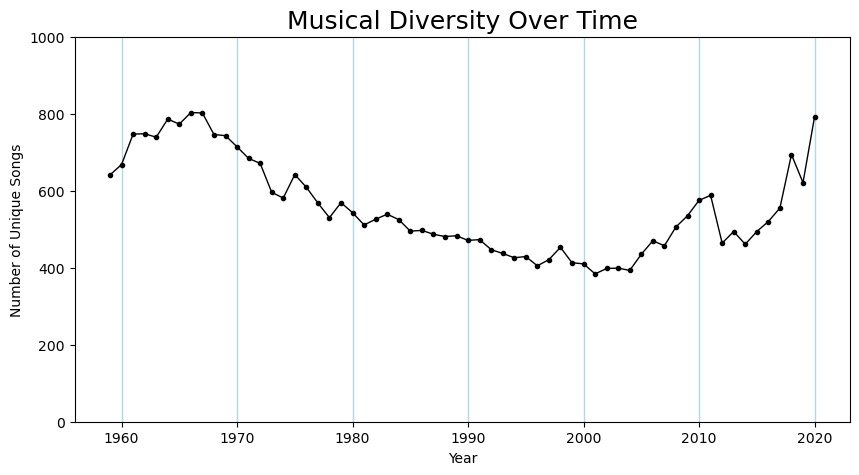

In [96]:
top_df = df.groupby('year')[['song']].nunique()
top_df.drop(1958,inplace = True)
top_df.drop(2021,inplace = True)
top_df.reset_index(inplace = True)

top_df.to_csv('musical_diversity.csv')

plt.figure(figsize = (10, 5))
plt.plot(top_df['year'], top_df['song'], linewidth = 1, marker='.', linestyle='-', color='black')
plt.ylim(0,1000)
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Number of Unique Songs', fontsize = 10)
plt.title('Musical Diversity Over Time', fontsize = 18)

plt.grid(axis='x', color='lightblue', linewidth=1)

plt.gca().set_facecolor('white')

plt.show()

> The graph depicts the number of unique songs that appeared on The Billboard Top 100 from 1959 through 2020. This can be termed as 'musical diversity' and it has undergone fluctuations and changes over time. <br>
> Diversity peaked in the 1960s, followed by a steady decline till the mid-2000s. Despite some variability since then, diversity has peaked again in recent years, nearly reaching the highs of the 1960s.

***
**`Part C`**

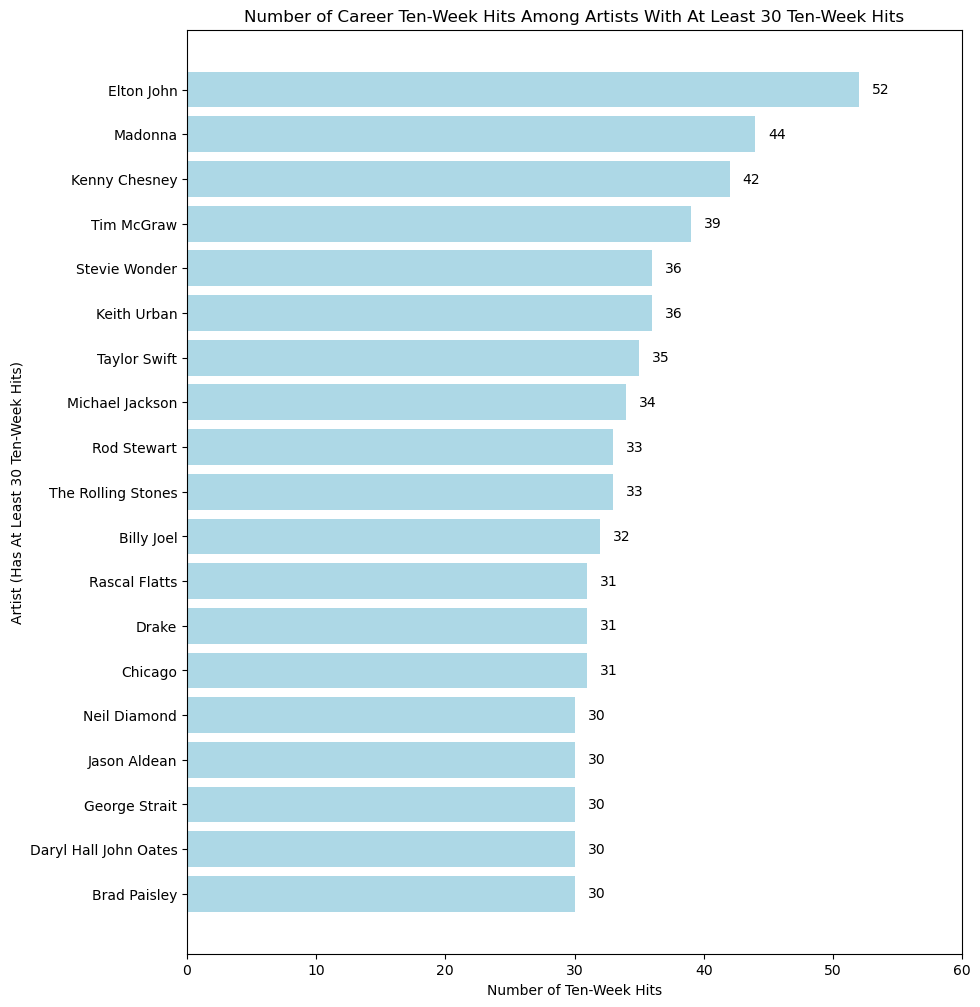

In [94]:
hits_df = billboard_df[billboard_df['count'] >= 10]
hits_df = hits_df.groupby('performer')[['song']].nunique()
hits_df = hits_df[hits_df['song'] >= 30]
hits_df = hits_df.sort_values('song', ascending=True)

hits_df.reset_index(inplace=True)

plt.figure(figsize=(10, 12))
bars = plt.barh(hits_df['performer'], hits_df['song'], color='lightblue')
plt.xlim(0, 60)
plt.xlabel('Number of Ten-Week Hits')
plt.ylabel('Artist (Has At Least 30 Ten-Week Hits)')
plt.title('Number of Career Ten-Week Hits Among Artists With At Least 30 Ten-Week Hits')

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center')
    
plt.show()


> The bars represent the number of Ten-week hits each artist has had in their career, with a Ten-week hit being defined as a single song that appeared on the Billboard Top 100 for at least ten weeks. This is a subset of exclusive artits who have had at least 30 such ten-week hits.<br>
> Sir Elton 'Hercules' John tops this list, towering over the rest.

***
***
***

## **`Problem 3`**
***

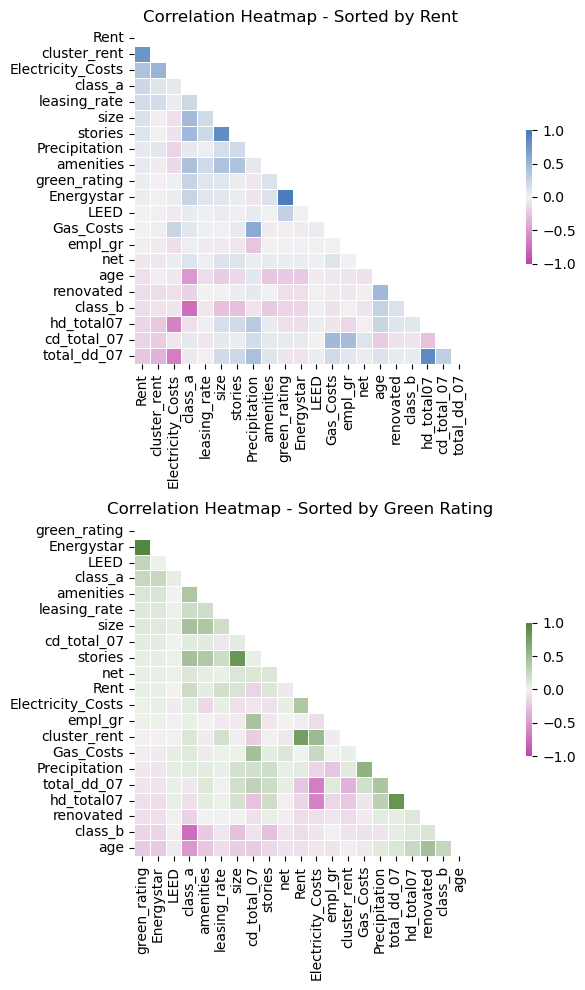

In [558]:
building_df = pd.read_csv('greenbuildings.csv')

corr = building_df.drop(columns=['CS_PropertyID','cluster']).corr()
corr_2 = corr

rent_correlations = corr['Rent'].sort_values(ascending = False)
corr = corr.loc[rent_correlations.index, rent_correlations.index]

green_correlations = corr_2['green_rating'].sort_values(ascending = False)
corr_2 = corr_2.loc[green_correlations.index, green_correlations.index]

mask = np.triu(np.ones_like(corr, dtype = bool))

fig, axs = plt.subplots(2, 1, figsize = (12, 10))

cmap = sns.diverging_palette(320, 250, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1.0, vmax = 1.0, center = 0, square = True, linewidths = 0.6, cbar_kws = {"shrink": .4}, ax = axs[0])
axs[0].set_title('Correlation Heatmap - Sorted by Rent')


cmap = sns.diverging_palette(320, 120, as_cmap = True)
sns.heatmap(corr_2, mask = mask, cmap = cmap, vmin = -1.0, vmax = 1.0, center = 0, square = True, linewidths = 0.6, cbar_kws = {"shrink": .4}, ax=axs[1])
axs[1].set_title('Correlation Heatmap - Sorted by Green Rating')

plt.tight_layout()

> From running simple correlation,<br>

> - Rent and Green Rating are barely correlated
> - Rent is most strongly correlated with Cluster Rent & Electricity Costs - indicating that buildings within the same cluster have similar rents, and electricity is the most influential utility; both correlations are positive in nature indicating an increase in rent when either factor increases 
> - Rent is also correlated with Class A building quality, which in turn is strongly correlated with size, stories, and amenities (Class A and B are also negatively correlated, indicating that Class C, by definition are definitely the least desirable)<br>

> - For the Green buildings in this data set, the ratings have come more often from Energystar certifications than LEED

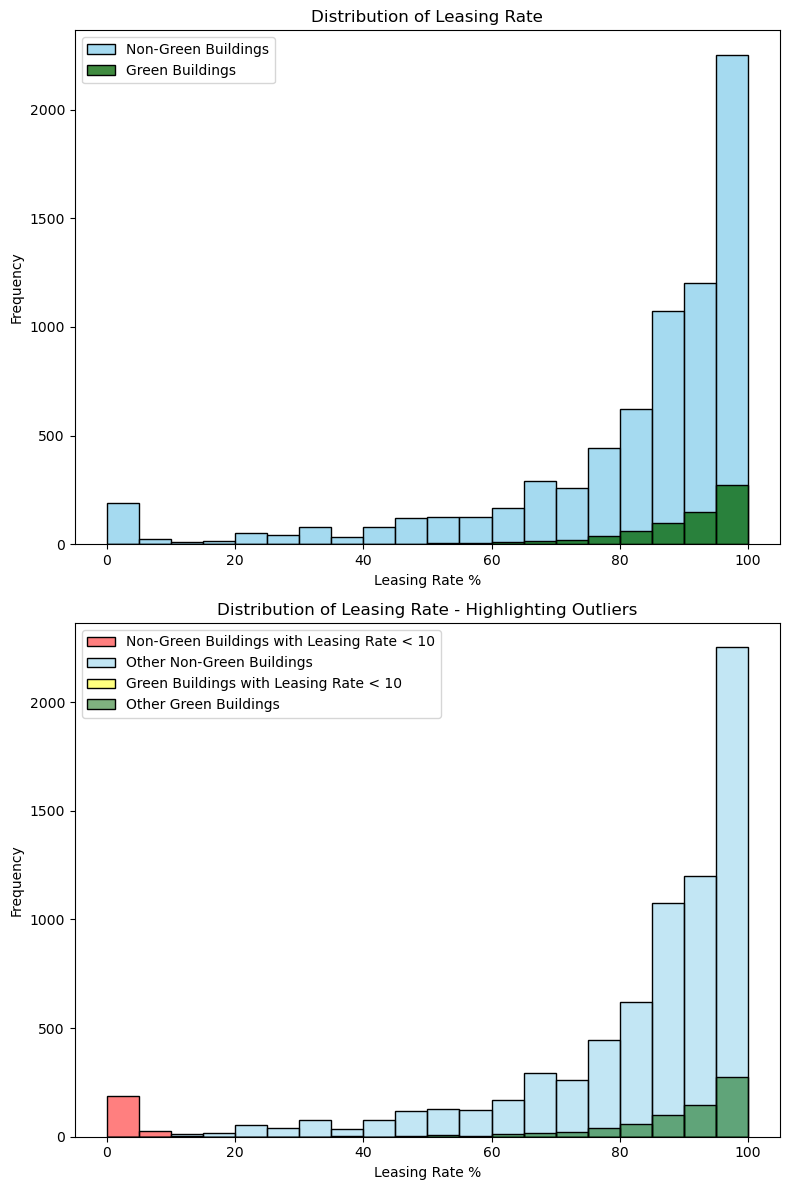

In [559]:
green_buildings = building_df[building_df['green_rating'] == 1]
non_green_buildings = building_df[building_df['green_rating'] == 0]

# print(building_df.shape)

fig, axes = plt.subplots(2, 1, figsize = (8, 12))

hue_colors_1 = {True: 'red', False: 'skyblue'}
hue_labels_1 = {True: 'Non-Green Buildings with Leasing Rate < 10', False: 'Other Non-Green Buildings'}

hue_colors_2 = {True: 'yellow', False: 'darkgreen'}
hue_labels_2 = {True: 'Green Buildings with Leasing Rate < 10', False: 'Other Green Buildings'}

sns.histplot(data = non_green_buildings, x = 'leasing_rate', ax = axes[0], color = 'skyblue', label = 'Non-Green Buildings', bins=20)
sns.histplot(data = green_buildings, x = 'leasing_rate', ax = axes[0], color = 'darkgreen', label = 'Green Buildings', bins=20)
axes[0].set_title('Distribution of Leasing Rate')
axes[0].set_xlabel('Leasing Rate %')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(data = non_green_buildings, x = 'leasing_rate', ax = axes[1], color = 'skyblue', label = 'Non-Green Buildings', bins=20, hue = building_df['leasing_rate'] < 10, palette = hue_colors_1)
sns.histplot(data = green_buildings, x = 'leasing_rate', ax = axes[1], color = 'darkgreen', label = 'Green Buildings', bins=20, hue = building_df['leasing_rate'] < 10, palette = hue_colors_2)
axes[1].set_title('Distribution of Leasing Rate - Highlighting Outliers')
axes[1].set_xlabel('Leasing Rate %')
axes[1].set_ylabel('Frequency')
axes[1].legend(labels=[hue_labels_1[True], hue_labels_1[False], hue_labels_2[True], hue_labels_2[False]])

# sns.histplot(data = non_green_buildings, x = 'Rent', ax = axes[1], color = 'skyblue', label = 'Non-Green Buildings', binwidth=2)
# sns.histplot(data = green_buildings, x = 'Rent', ax = axes[1], color = 'darkgreen', label = 'Green Buildings', binwidth=2)
# axes[1].set_title('Distribution of Rent')
# axes[1].set_xlabel('Rent')
# axes[1].set_ylabel('Frequency')
# axes[1].legend()

plt.tight_layout()
plt.show()


> Retracing the steps of the developer's staff member, to question their methodology of marking outliers, the distribution of occupancy (leasing rate) is plotted, highlighting the outliers identified by the staff.

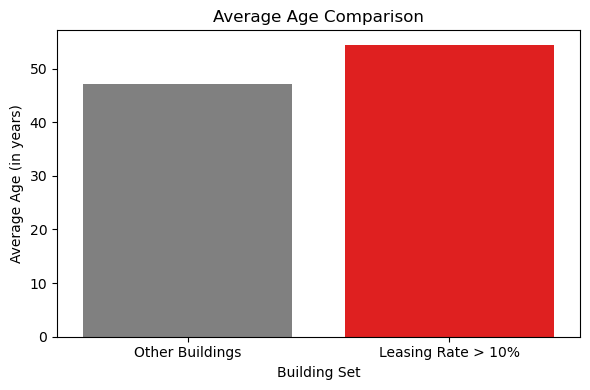

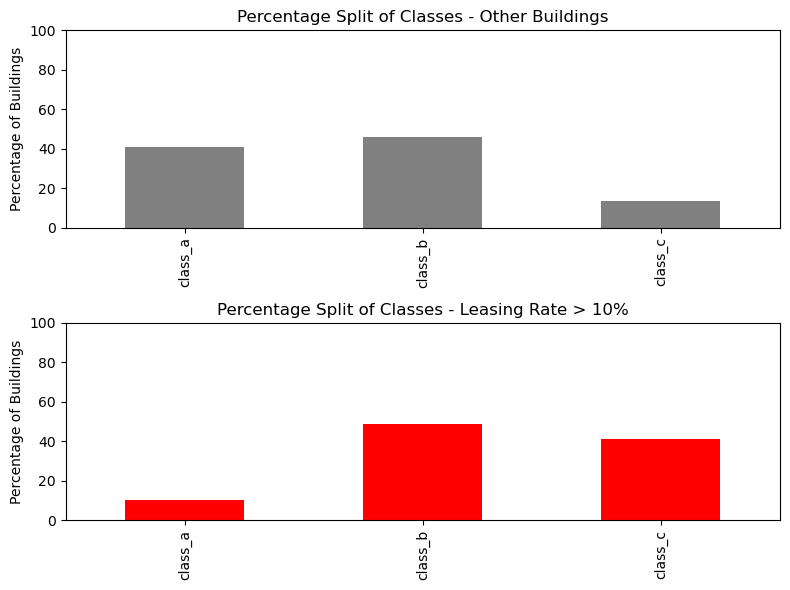

In [560]:
mask = building_df['leasing_rate'] <= 10
building_df_2 = building_df[mask]
building_df_3 = building_df[~mask]

# display(building_df_2.shape)
# display(building_df_3.shape)

green_buildings = building_df_2[building_df_2['green_rating'] == 1]
non_green_buildings = building_df_2[building_df_2['green_rating'] == 0]

# display(building_df_2.shape)
# display(green_buildings.shape)
# display(non_green_buildings.shape)

# columns_to_compare = ['Rent', 'age', 'empl_gr', 'renovated', 'cluster_rent']


avg_age_building_df_3 = building_df_3['age'].mean()
avg_age_building_df_2 = building_df_2['age'].mean()

plt.figure(figsize = (6, 4))
sns.barplot(x = ['Other Buildings', 'Leasing Rate > 10%'], y = [avg_age_building_df_3, avg_age_building_df_2], palette=['grey', 'red'])
plt.title('Average Age Comparison')
plt.xlabel('Building Set')
plt.ylabel('Average Age (in years)')
plt.tight_layout()
plt.show()


class_counts_df_2 = building_df_2[['class_a', 'class_b']].sum() / len(building_df_2)
class_counts_df_3 = building_df_3[['class_a', 'class_b']].sum() / len(building_df_3)

class_counts_df_2['class_c'] = 1 - class_counts_df_2['class_a'] - class_counts_df_2['class_b']
class_counts_df_3['class_c'] = 1 - class_counts_df_3['class_a'] - class_counts_df_3['class_b']

plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
(class_counts_df_3*100).plot(kind='bar', color=['grey', 'grey', 'grey'])
plt.title('Percentage Split of Classes - Other Buildings')
plt.ylabel('Percentage of Buildings')
plt.ylim(0,100)

# Plot for building_df_2
plt.subplot(2, 1, 2)
(class_counts_df_2*100).plot(kind='bar', color=['red', 'red', 'red'])
plt.title('Percentage Split of Classes - Leasing Rate > 10%')
plt.ylabel('Percentage of Buildings')
plt.ylim(0,100)

plt.tight_layout()
plt.show()






> The number of occupany-related outliers are 215, out of which only 1 is a green building. Moreover, the average age and the composition of Class B+C is higher in these outliers. In agreement with the staff member, these outliers will be excluded from further analysis.

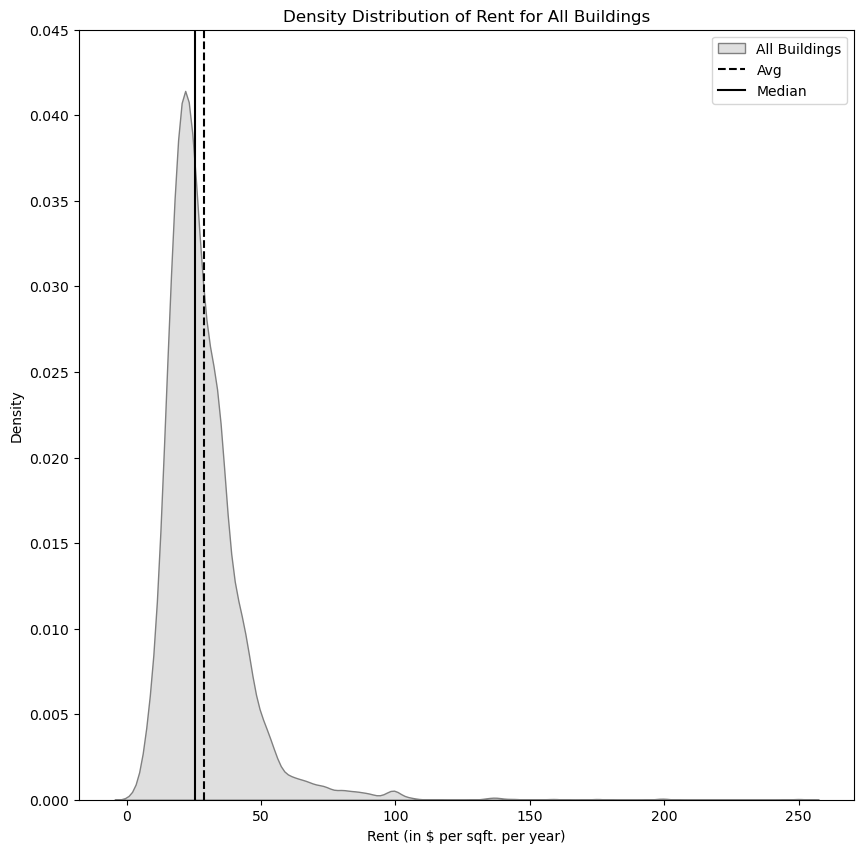

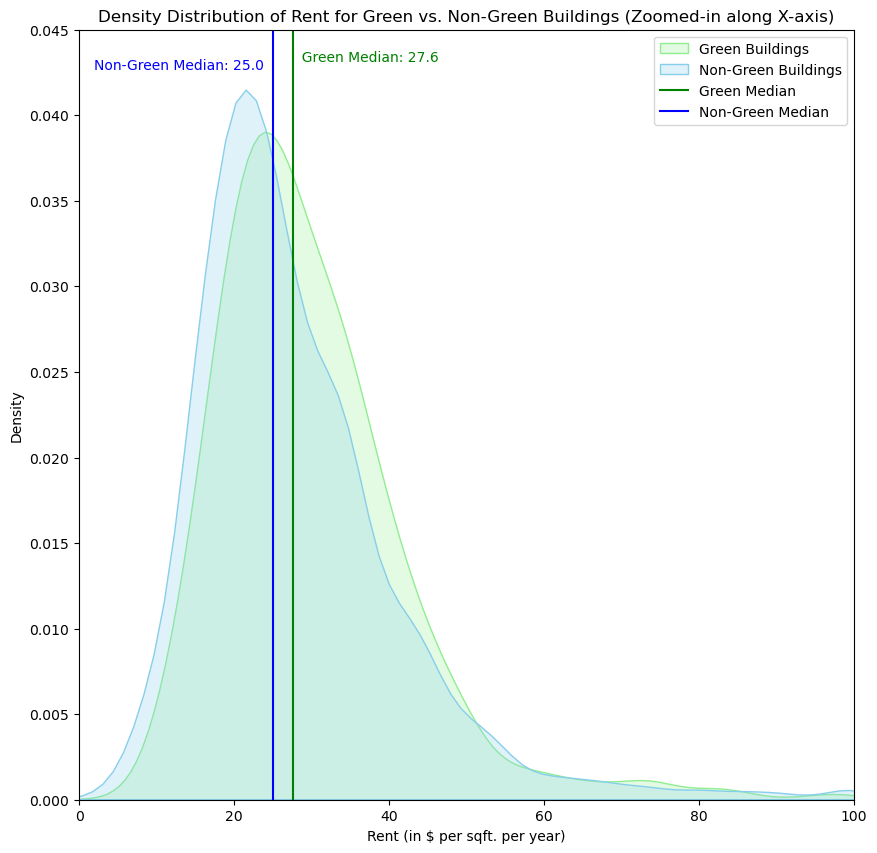

In [561]:
green_buildings = building_df_3[building_df_3['green_rating'] == 1]
non_green_buildings = building_df_3[building_df_3['green_rating'] == 0]

plt.figure(figsize=(10, 10))

sns.kdeplot(building_df_3['Rent'], label='All Buildings', fill=True, color = 'grey')

plt.axvline(x=building_df_3['Rent'].mean(), color='black', linestyle='--', label='Avg')
plt.axvline(x=building_df_3['Rent'].median(), color='black', linestyle='-', label='Median')

plt.title('Density Distribution of Rent for All Buildings')
plt.xlabel('Rent (in $ per sqft. per year)')
plt.ylabel('Density')
plt.ylim(0,0.045)
plt.legend()
plt.show()



plt.figure(figsize=(10, 10))

sns.kdeplot(green_buildings['Rent'], label='Green Buildings', fill=True, color = 'lightgreen')

sns.kdeplot(non_green_buildings['Rent'], label='Non-Green Buildings', fill=True,  color = 'skyblue')

green_avg = green_buildings['Rent'].mean()
green_median = green_buildings['Rent'].median()
non_green_avg = non_green_buildings['Rent'].mean()
non_green_median = non_green_buildings['Rent'].median()

# plt.axvline(x=green_buildings['Rent'].mean(), color='green', linestyle='--', label='Green Avg')
plt.axvline(x=green_buildings['Rent'].median(), color='green', linestyle='-', label='Green Median')
# plt.axvline(x=non_green_buildings['Rent'].mean(), color='blue', linestyle='--', label='Non-Green Avg')
plt.axvline(x=non_green_buildings['Rent'].median(), color='blue', linestyle='-', label='Non-Green Median')

# plt.text(green_avg, 0.042, f'Green Avg: {green_avg:.1f}', color='green', ha='left', va = 'top')
plt.text(green_median, 0.0438, f'  Green Median: {green_median:.1f}', color='green', ha='left', va = 'top')
# plt.text(non_green_avg, 0.030, f'Non-Green Avg: {non_green_avg:.1f}', color='blue', ha='left', va = 'bottom')
plt.text(non_green_median, 0.0425, f'Non-Green Median: {non_green_median:.1f}  ', color='blue', ha='right', va = 'bottom')

plt.title('Density Distribution of Rent for Green vs. Non-Green Buildings (Zoomed-in along X-axis)')
plt.xlabel('Rent (in $ per sqft. per year)')
plt.ylabel('Density')
plt.xlim(0,100)
plt.ylim(0,0.045)
plt.legend()
plt.show()

> For the full data set, excluding occupancy-related outleirs, there are a few buildings lying north to a rent of USD 100 per sqft. per year, but there is no reason to treat them as outliers as such. Hence taking the median as a comparative measure of rent makes sense, as its less prone to such "outliers." <br>

> Comparing the building segments, there is a difference of nearly USD 2.6 (27.6-25.0) in median rent. For the 250,000 sqft. building in question, this converts to $650,000 of additional income per year

Average Age of Green Buildings: 23.88
Average Age of Non-Green Buildings: 49.31

Median Age of Green Buildings: 22.00
Median Age of Non-Green Buildings: 36.00


<Figure size 1000x600 with 0 Axes>

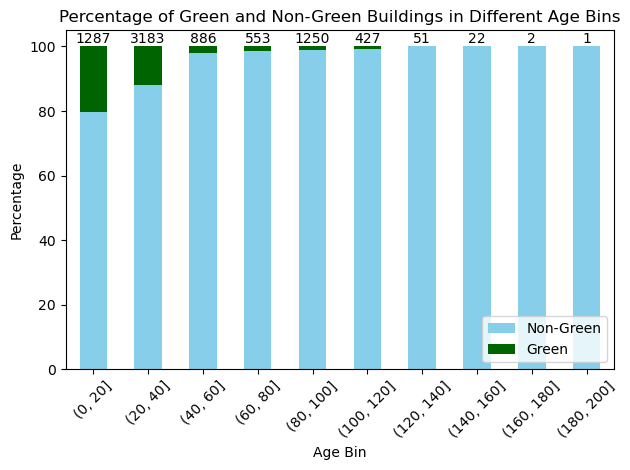

In [564]:
avg_age_green = building_df_3[building_df_3['green_rating'] == 1]['age'].mean()
median_age_green = building_df_3[building_df_3['green_rating'] == 1]['age'].median()

avg_age_non_green = building_df_3[building_df_3['green_rating'] == 0]['age'].mean()
median_age_non_green = building_df_3[building_df_3['green_rating'] == 0]['age'].median()

print(f"Average Age of Green Buildings: {avg_age_green:.2f}")
print(f"Average Age of Non-Green Buildings: {avg_age_non_green:.2f}\n")

print(f"Median Age of Green Buildings: {median_age_green:.2f}")
print(f"Median Age of Non-Green Buildings: {median_age_non_green:.2f}")


bin_size = 20
age_bins = range(0, max(building_df_3['age']) + bin_size, bin_size)

# dfmi['one']['second']
# dfmi.loc[:, ('one', 'second')]

building_df_3.loc['age_bin'] = pd.cut(building_df_3['age'], bins = age_bins)

age_bin_counts = building_df_3.groupby(['age_bin', 'green_rating']).size().unstack(fill_value=0)
age_bin_percentages = age_bin_counts.div(age_bin_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
age_bin_percentages.plot(kind='bar', stacked=True, color = ['skyblue','darkgreen'])

plt.title('Percentage of Green and Non-Green Buildings in Different Age Bins')
plt.xlabel('Age Bin')
plt.ylabel('Percentage')
plt.xticks(rotation = 45)
plt.legend(loc = 'lower right', labels = ['Non-Green', 'Green'])

for i, age_bin in enumerate(age_bin_counts.index):
    total_count = age_bin_counts.loc[age_bin].sum()
    plt.text(i, 100, f'{total_count}', ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()
plt.show()

> - Before further deciding if the extra USD 5M is worth spending, other variables affecting both rent and green rating need exploration, since green rating by itself does not affect rent directly. Age seems to be an important feature as it ranges from 0 to ~200, but the awareness and benefits of green buildings is not a 200-year old idea <br>
> - On explooration, the majority of green buildings are 40 years or youngerm while there is a fair share of 40+ year old non-green buildings. It seems fair to remove such buildings for later analyses

<Figure size 1000x600 with 0 Axes>

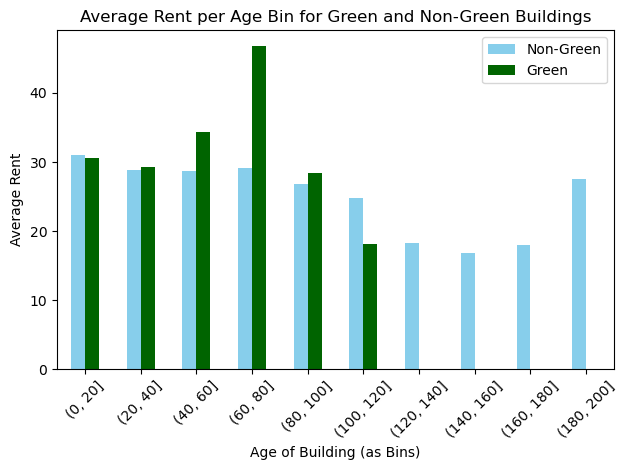

<Figure size 1000x600 with 0 Axes>

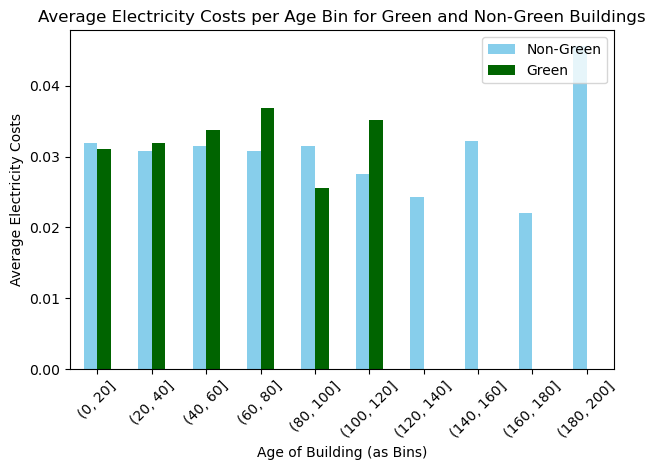

Averages for All Buildings:
              Gas_Costs  Electricity_Costs
green_rating                              
0              0.011352           0.030893
1              0.011096           0.031586

Averages for Buildings with Age <= 120:
              Gas_Costs  Electricity_Costs
green_rating                              
0              0.011348           0.030937
1              0.011096           0.031586


Medians for All Buildings:
              Gas_Costs  Electricity_Costs
green_rating                              
0              0.010296           0.032737
1              0.010300           0.034100

Medians for Buildings with Age <= 120:
              Gas_Costs  Electricity_Costs
green_rating                              
0              0.010296           0.032737
1              0.010300           0.034100


In [583]:
avg_rent_per_age_bin = building_df_3.groupby(['age_bin', 'green_rating'])['Rent'].mean().unstack(fill_value = 0)

plt.figure(figsize = (10, 6))
avg_rent_per_age_bin.plot(kind = 'bar', color=['skyblue', 'darkgreen'])

plt.title('Average Rent per Age Bin for Green and Non-Green Buildings')
plt.xlabel('Age of Building (as Bins)')
plt.ylabel('Average Rent')
plt.xticks(rotation=45)
plt.legend(loc='upper right', labels=['Non-Green', 'Green'])

plt.tight_layout()
plt.show()


avg_electricity_per_age_bin = building_df_3.groupby(['age_bin', 'green_rating'])['Electricity_Costs'].mean().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
avg_electricity_per_age_bin.plot(kind='bar', color=['skyblue', 'darkgreen'])

plt.title('Average Electricity Costs per Age Bin for Green and Non-Green Buildings')
plt.xlabel('Age of Building (as Bins)')
plt.ylabel('Average Electricity Costs')
plt.xticks(rotation=45)
plt.legend(loc='upper right', labels=['Non-Green', 'Green'])

plt.tight_layout()
plt.show()



avg_all = building_df_3.groupby('green_rating')[['total_dd_07', 'Gas_Costs', 'Electricity_Costs']].mean()
print("Averages for All Buildings:")
print(avg_all)

building_df_4 = building_df_3[building_df_3['age'] <= 120]
avg_age_limit = building_df_4.groupby('green_rating')[['total_dd_07', 'Gas_Costs', 'Electricity_Costs']].mean()
print("\nAverages for Buildings with Age <= 120:")
print(avg_age_limit)

median_all = building_df_3.groupby('green_rating')[['total_dd_07', 'Gas_Costs', 'Electricity_Costs']].median()
print("\n\nMedians for All Buildings:")
print(median_all)

building_df_4 = building_df_3[building_df_3['age'] <= 120]
median_age_limit = building_df_4.groupby('green_rating')[['total_dd_07', 'Gas_Costs', 'Electricity_Costs']].median()
print("\nMedians for Buildings with Age <= 120:")
print(median_age_limit)

> - On average, the rent goes down slightly among non-green buildings over time, while the same for green buildings remain constant (caveating smaller sample sizes distrbuted over time) <br>
> - This gain in rent though is offset by an increase in Electricity and Gas costs over time for green buildings

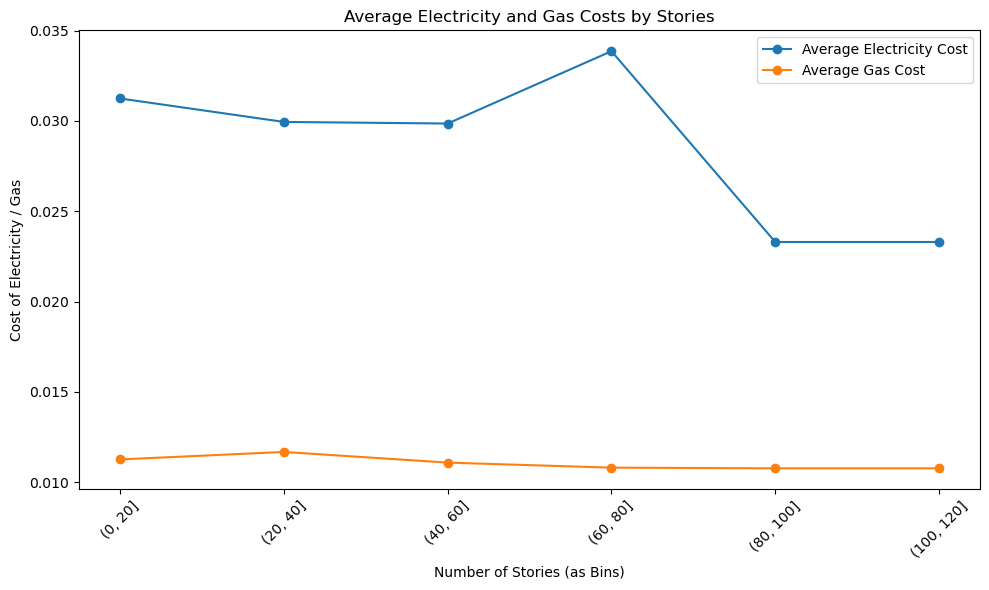

In [582]:
bin_size = 20
building_df_3['stories_bin'] = pd.cut(building_df_3['stories'], bins=range(0, max(building_df_3['stories']) + bin_size, bin_size))

avg_electricity_cost = building_df_3.groupby('stories_bin')['Electricity_Costs'].mean()
avg_gas_cost = building_df_3.groupby('stories_bin')['Gas_Costs'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot average electricity cost
plt.plot(avg_electricity_cost.index.astype(str), avg_electricity_cost, marker='o', label='Average Electricity Cost')

# Plot average gas cost
plt.plot(avg_gas_cost.index.astype(str), avg_gas_cost, marker='o', label='Average Gas Cost')

plt.xlabel('Number of Stories (as Bins)')
plt.ylabel('Cost of Electricity / Gas')
plt.title('Average Electricity and Gas Costs by Stories')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

> - So the additional revenue compensates for the initial overhead in, 5,000,000/650,000 = roughly 7.7 years. At this same time, the 650,000 is not the "true" additional revenue for green buildings, it would be a value of 650,000 - (X). X would majorly be a function of electricity and gas costs, besides others.<br>
> - For the given 15 stories building that needs to be constructed there is not a lot of difference in these utilities costs compared to taller buildings.<br>
> - Even if X amounts to something in the order of 10,000s, a reduction to 550,000 in additional revenue, extends the period for recuperation becomes roughly 9.1 years. Another reduction to 450,000 makes it 11.1 years.

> 8-12 years, in the context of the total investment amount, in a country like the US, with a economy that always has ended up stabilizing over time, seems a fair investment.<br>

> This decision has chosen to overlook the fact that green buildings have more electricity costs(!), which was an assumed key driver for them. But the higher rent seems to offset this concern, probably driven by employee productivity, corporate outlook on sustainability, maintaining a public image etc. which are not quantified in the data set <br>

P.S. Perhaps the real lesson from this exercise is learning to never question the Excel legends (for data sets that Excel can support :)

***
***
***

## **`Problem 4`**
***

> ### SCENE: Bus stops in and around the UT campus
> ### TIME PERIOD: Fall semester (Sep - Nov), year 2018
> #### PRODUCED BY: CapMetro Austin

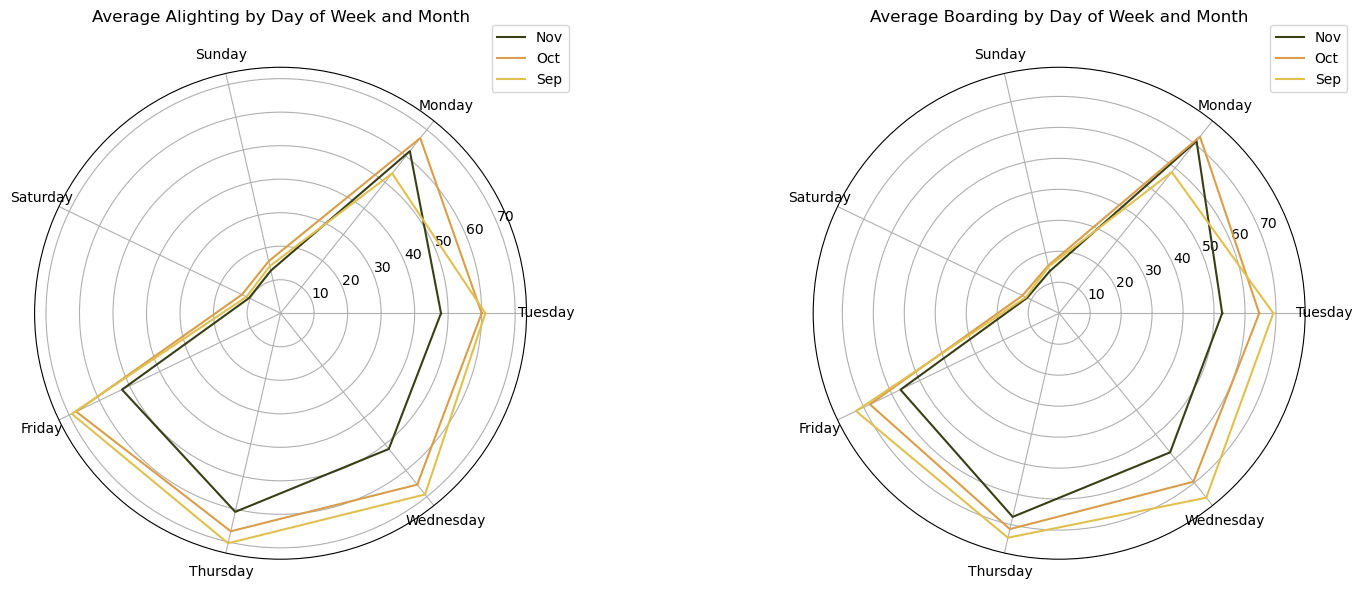

In [577]:
data = pd.read_csv('capmetro_UT.csv')

data['timestamp'] = pd.to_datetime(data['timestamp'])
data['day_of_week'] = data['timestamp'].dt.day_name()

pivot_table_alighting = data.pivot_table(index='day_of_week', columns='month', values='alighting', aggfunc='mean')
pivot_table_boarding = data.pivot_table(index='day_of_week', columns='month', values='boarding', aggfunc='mean')

days_order = ['Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday']

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': 'polar'})

# Chart 1: Average Alighting by Day of Week and Month
ax1 = axes[0]
colors = ['#383F17', '#D99E49', '#E0C14F']
for i, month in enumerate(pivot_table_alighting.columns):
    values = pivot_table_alighting[month].tolist()
    values += values[:1]  # Repeat the first value to close the circle
    angles = np.linspace(0, 2 * np.pi, len(pivot_table_alighting) + 1)
    ax1.plot(angles, values, label=month, color=colors[i])

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(days_order)
ax1.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
ax1.set_title('Average Alighting by Day of Week and Month\n')

# Chart 2: Average Boarding by Day of Week and Month
ax2 = axes[1]
for i, month in enumerate(pivot_table_boarding.columns):
    values = pivot_table_boarding[month].tolist()
    values += values[:1]  # Repeat the first value to close the circle
    angles = np.linspace(0, 2 * np.pi, len(pivot_table_boarding) + 1)
    ax2.plot(angles, values, label=month, color=colors[i])

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(days_order)
ax2.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
ax2.set_title('Average Boarding by Day of Week and Month\n')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


> - There is minimal bus ridership acitvity (both boarding and alighting) during weekends in each month of Fall

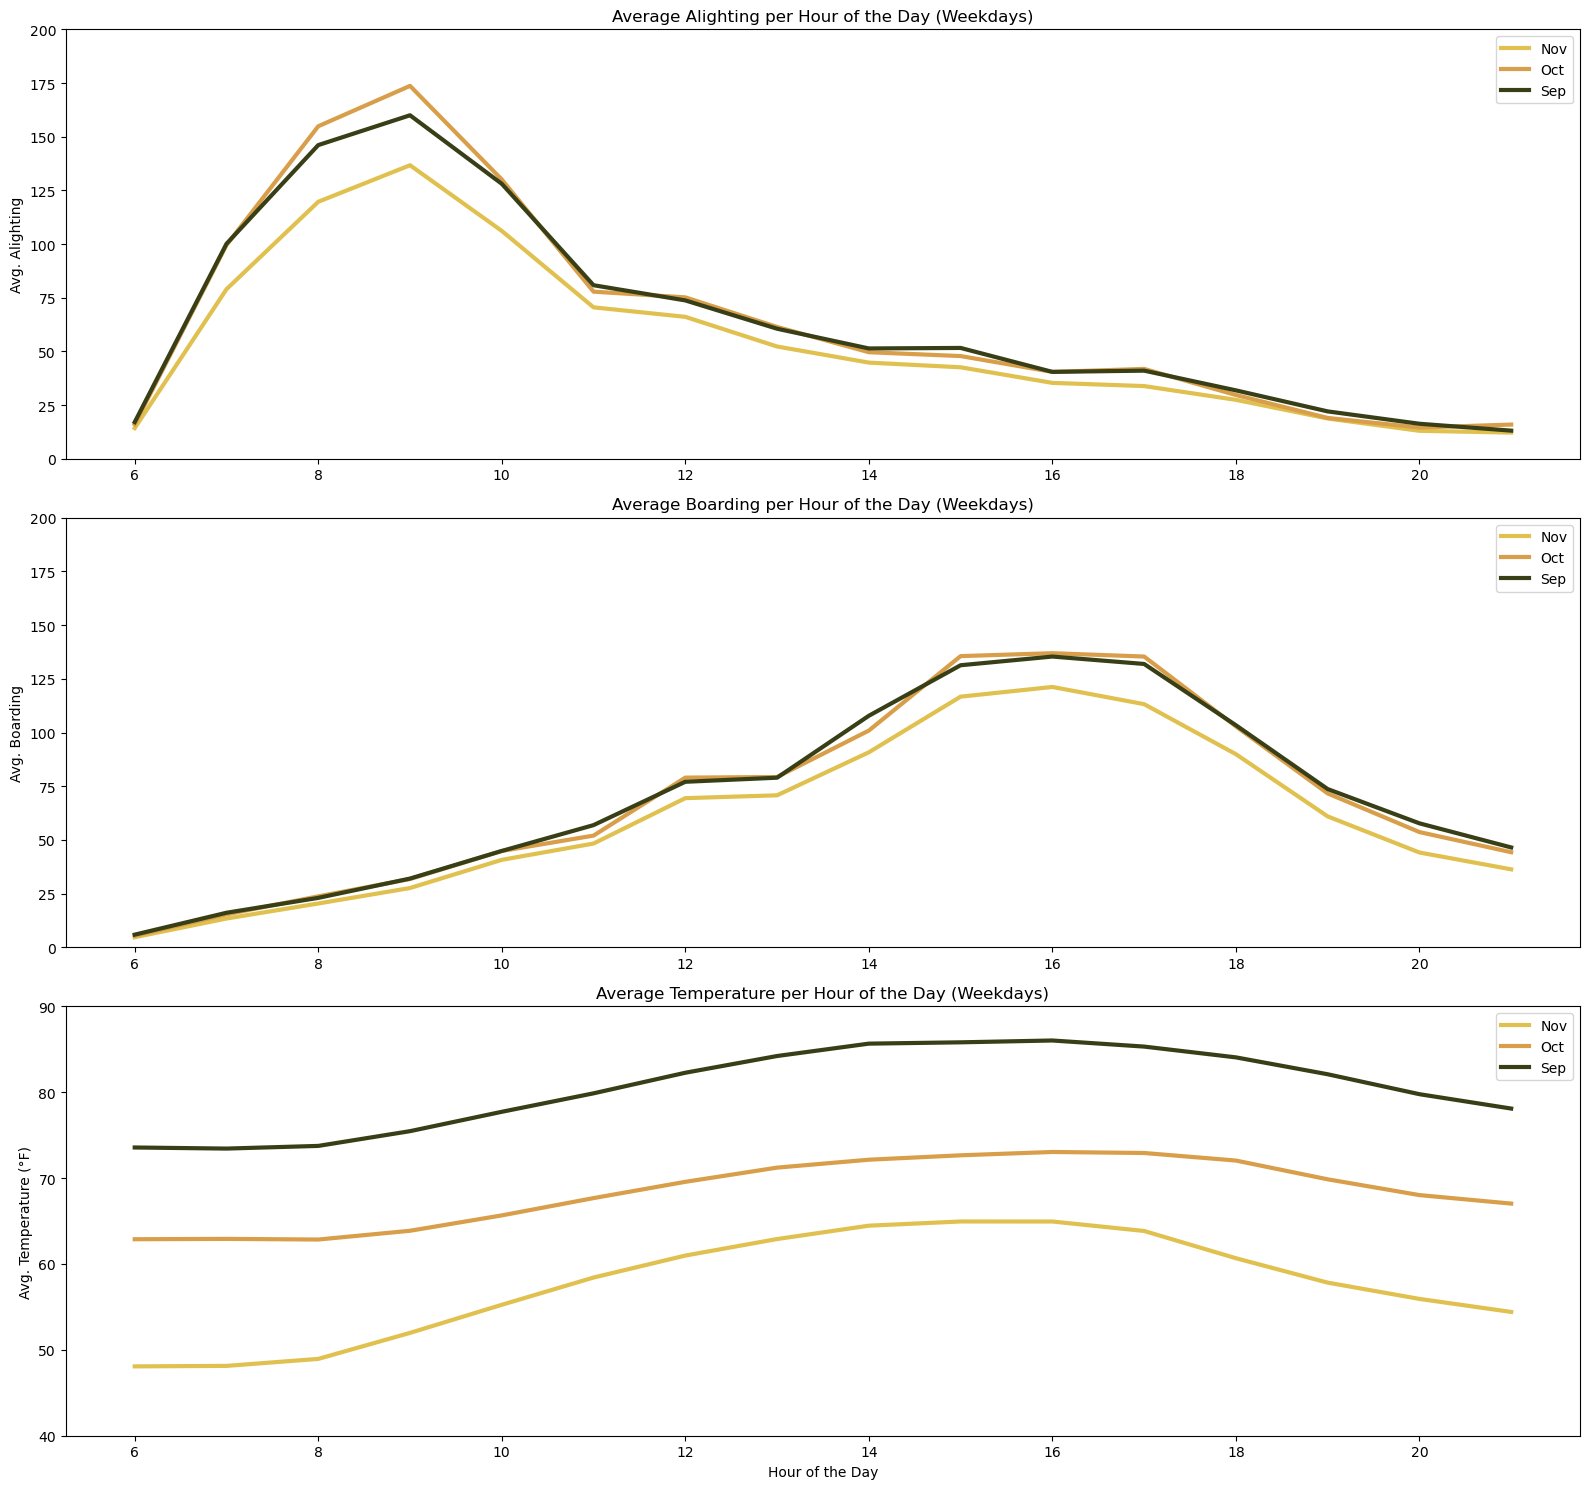

In [573]:
data = pd.read_csv('capmetro_UT.csv')

data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

weekdays_data = data[data['weekend'] == 'weekday']

colors = {'Sep': '#383F17', 'Oct': '#D99E49', 'Nov': '#E0C14F'}

fig, axes = plt.subplots(3, 1, figsize=(16, 15))

boarding_by_hour = weekdays_data.groupby(['hour_of_day', 'month'])['boarding'].mean().unstack()
for month in boarding_by_hour.columns:
    axes[1].plot(boarding_by_hour.index, boarding_by_hour[month], color=colors[month], label=month, linewidth=3)
axes[1].set_title('Average Boarding per Hour of the Day (Weekdays)')
axes[1].set_ylabel('Avg. Boarding')
axes[1].set_ylim(0,200)
axes[1].legend()

alighting_by_hour = weekdays_data.groupby(['hour_of_day', 'month'])['alighting'].mean().unstack()
for month in alighting_by_hour.columns:
    axes[0].plot(alighting_by_hour.index, alighting_by_hour[month], color=colors[month], label=month, linewidth=3)
axes[0].set_title('Average Alighting per Hour of the Day (Weekdays)')
axes[0].set_ylabel('Avg. Alighting')
axes[0].set_ylim(0,200)
axes[0].legend()

temperature_by_hour = weekdays_data.groupby(['hour_of_day', 'month'])['temperature'].mean().unstack()
for month in temperature_by_hour.columns:
    axes[2].plot(temperature_by_hour.index, temperature_by_hour[month], color=colors[month], label=month, linewidth=3)
axes[2].set_title('Average Temperature per Hour of the Day (Weekdays)')
axes[2].set_xlabel('Hour of the Day')
axes[2].set_ylabel('Avg. Temperature (°F)')
axes[2].set_ylim(40,90)
axes[2].legend()

plt.tight_layout()
plt.show()

> - There is peak inflow of people on the campus, from 8-10 AM. <br>
> - As the temperatues peak in the evening, more people head back out of the campus (such people certainly have it easier in November compared to September, which is surely a 'Summer' month pretending to be part of the cooler 'Fall' gang)
> - There are a small pockets of people who board early and alight late, probably campus dwellers preferring to take the bus for shorter routes

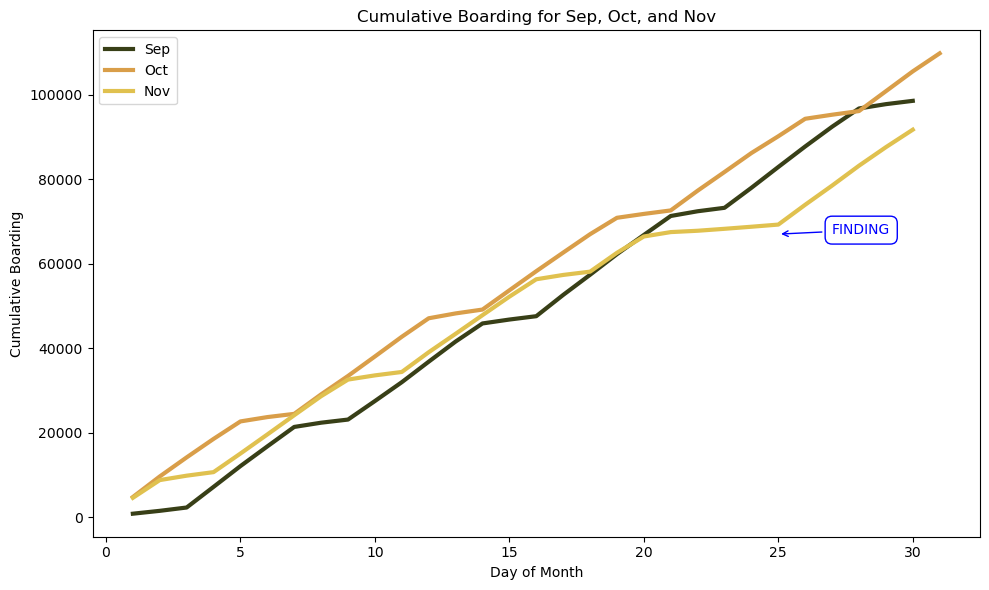

In [579]:
data = pd.read_csv('capmetro_UT.csv')

data['timestamp'] = pd.to_datetime(data['timestamp'])

monthly_groups = data.groupby(data['timestamp'].dt.month)

# Define custom colors for each month
colors = {'September': '#383F17', 'October': '#D99E49', 'November': '#E0C14F'}

plt.figure(figsize=(10, 6))

for month, month_data in monthly_groups:
    cumulative_boarding_per_day = month_data.groupby(month_data['timestamp'].dt.day)['boarding'].sum()
    cumulative_boarding = cumulative_boarding_per_day.cumsum()
    month_name = month_data['timestamp'].dt.month_name().iloc[0]
    plt.plot(cumulative_boarding.index, cumulative_boarding, label=month_name, color=colors[month_name], linewidth = 3)

plt.xlabel('Day of Month')
plt.ylabel('Cumulative Boarding')
plt.title('Cumulative Boarding for Sep, Oct, and Nov')
plt.legend(labels = ['Sep', 'Oct', 'Nov'])

plt.annotate('FINDING', xy=(25, 67000), xytext=(27, 67000),
             arrowprops=dict(color='blue', arrowstyle='->'),
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='blue', facecolor='white'),
             fontsize=10, color='blue')

plt.tight_layout()
plt.show()

> - Observing the cumulative ridership (boarding in this example), the findings from the first chart are observed repeatedly, with weekend plateuas of ridership. <br>
> - However, out of the 'blue', if attention is drawn to the rather crudely drawn 'finding' box, a large plateau shows up in November, for the Thanksiving season with people heading home for the holidays.

P.S. Coincidentally, 2018 was when this article (https://thedailytexan.com/2018/11/03/ut-should-take-a-full-week-off-for-thanksgiving-break/) advocating for a week-long break was published.

***
***
***

## **`Problem 5`**
***

Explained Variance Ratios: [0.2754426  0.22671146 0.14148609 0.08823201 0.06544317 0.05521016
 0.04755989 0.04559184 0.03063855 0.02069961 0.00298462]


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

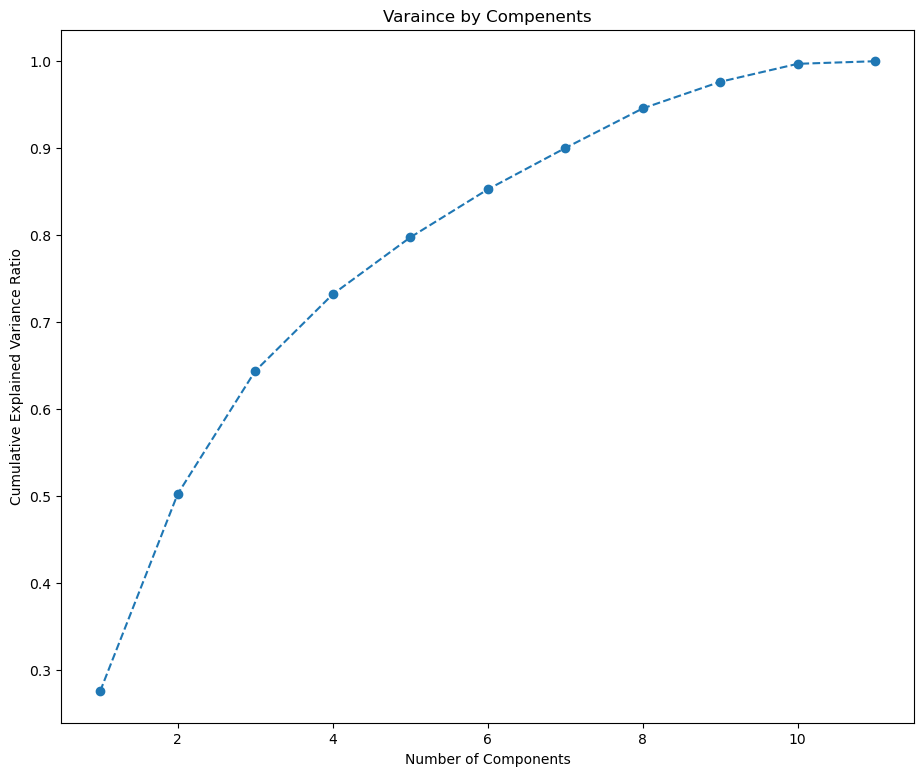

In [584]:
df = pd.read_csv('wine.csv')
# df.head(10)

df_new = df.iloc[:,:-2]
# df_new.head(10)

# df.shape

scale = StandardScaler()
scaled_df = scale.fit_transform(df_new)

pca = PCA(random_state=42)
pca.fit(scaled_df)

print("Explained Variance Ratios:",pca.explained_variance_ratio_)

plt.figure(figsize = (11,9))
plt.plot(range(1,12),pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title("Varaince by Compenents")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")

> - The cumulative variance is above 85% when 6 components are considered, there are not a lot of gains beyond choosing 6

Explained Variance Ratios: [0.2754426  0.22671146 0.14148609 0.08823201 0.06544317 0.05521016]


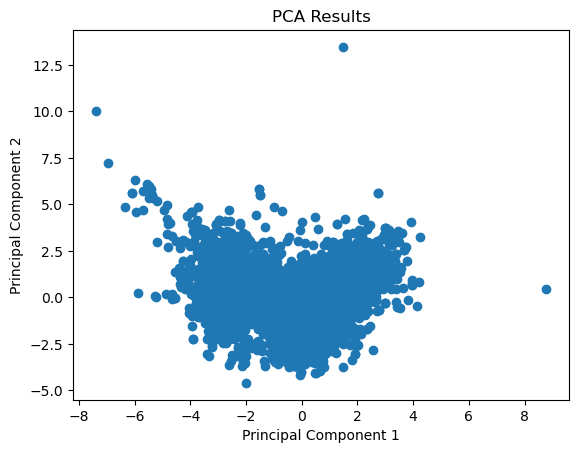

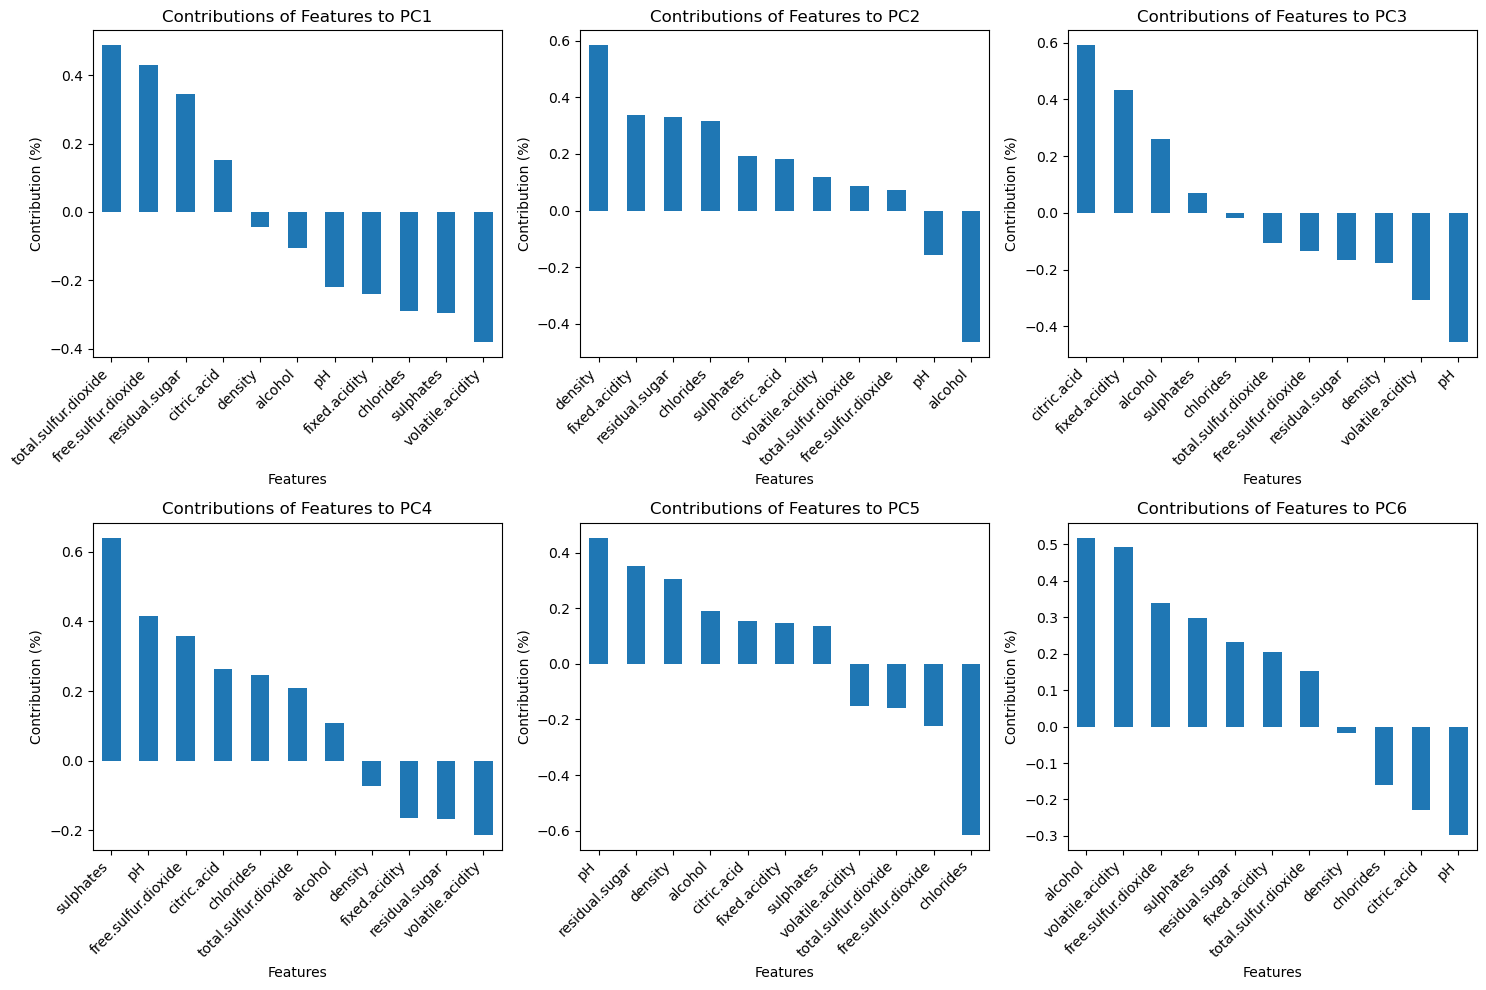

In [587]:
pca = PCA(n_components = 6, random_state=42)
pca_result = pca.fit_transform(scaled_df)
print("Explained Variance Ratios:",pca.explained_variance_ratio_)

plt.scatter(pca_result[:,0], pca_result[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

print("\n\n")

loadings_df = pd.DataFrame(pca.components_, columns=df_new.columns)

num_pcs = len(pca.components_)
num_columns = 3 
num_rows = (num_pcs + num_columns - 1) // num_columns 
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

for pc_idx, ax in enumerate(axes.flat):
    if pc_idx < num_pcs:
        pc_loadings = loadings_df.iloc[pc_idx]
        pc_loadings_sorted = pc_loadings.sort_values(ascending=False)
        pc_loadings_sorted.plot(kind='bar', ax=ax)
        ax.set_title(f'Contributions of Features to PC{pc_idx+1}')
        ax.set_ylabel('Contribution (%)')
        ax.set_xlabel('Features')
        ax.set_xticklabels(pc_loadings_sorted.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

> - Caveat, these are observations of a non-wine-drinkers / connoisseurs: PC2 seems to capture the difference in wine colors since it is differently contributed by density and alcohol, the factors which are higher for red wine compared to white wine
> - PC1 seems to be contribtued to differently by chemical properties that influence preservability and odor/aroma, hinting at being able to capture the quality ratings for wine which may be dependent more on such features

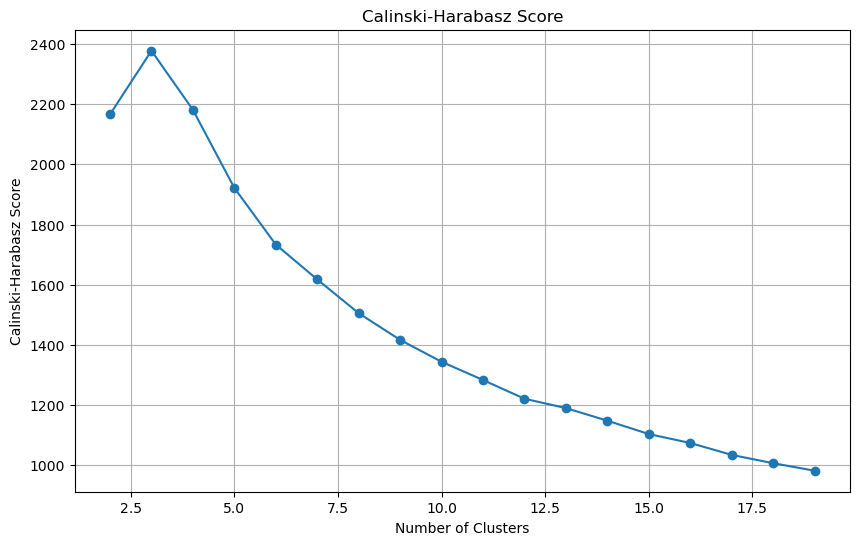

In [589]:
ch_score_df = pd.DataFrame(columns=["Number of clusters", "CH score"])
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 45)
    cluster = kmeans.fit(pca_result)
    labels = cluster.labels_
    
    if len(set(labels)) > 1:
        ch_score = calinski_harabasz_score(pca_result, labels)
        iteration_df = pd.DataFrame({"Number of clusters": [i], "CH score": [ch_score]})
        ch_score_df = pd.concat([ch_score_df, iteration_df], ignore_index=True)
        
plt.figure(figsize=(10, 6))
plt.plot(ch_score_df["Number of clusters"], ch_score_df["CH score"], marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)
plt.show()

> - After 2 clusters, the CH score drops down considerably

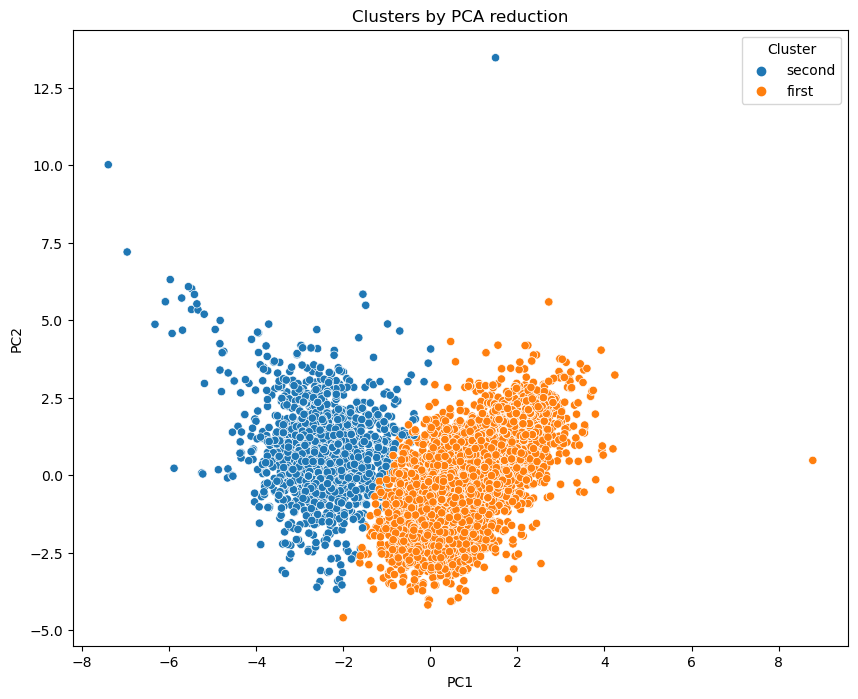

In [590]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 45)
cluster_final = kmeans.fit(pca_result)

df_plot = pd.concat([df.reset_index(drop = True), pd.DataFrame(pca_result)],axis = 1)
df_plot.columns.values[-6:] = ['PC1','PC2','PC3','PC4','PC5','PC6']
df_plot['Cluster'] = cluster_final.labels_

df_plot['Cluster'] = df_plot['Cluster'].map({0:'first',1:'second'})

plt.figure(figsize = (10,8))
sns.scatterplot(data=df_plot, x="PC1", y="PC2", hue="Cluster")
plt.title("Clusters by PCA reduction")
plt.show()

In [591]:
pca_cross = pd.crosstab(df_plot['color'], df_plot['Cluster'])
pca_cross

Cluster  first  second
color                 
red         26    1573
white     4823      75

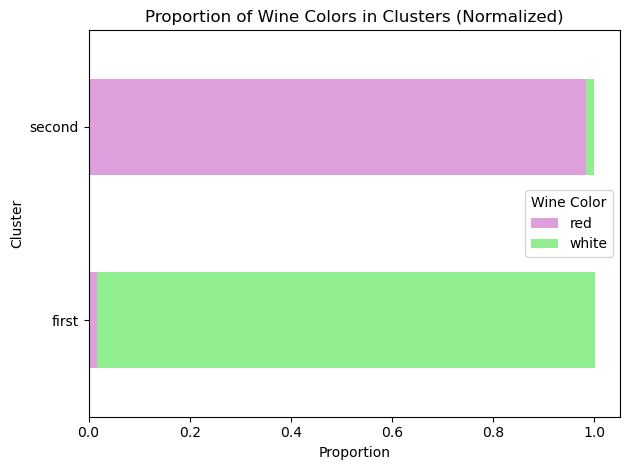

In [599]:
pca_cross_normalized = pca_cross.div(pca_cross.sum(axis=1), axis=0)

pca_cross_normalized.T.plot(kind='barh', stacked=True, color=['plum', 'lightgreen'])
plt.title('Proportion of Wine Colors in Clusters (Normalized)')
plt.ylabel('Cluster')
plt.xlabel('Proportion')
plt.legend(title='Wine Color')
plt.tight_layout()
plt.show()

In [593]:
pca_cross_quality = pd.crosstab(df_plot['quality'], df_plot['Cluster'])
pca_cross_quality

Cluster  first  second
quality               
3           18      12
4          139      77
5         1435     703
6         2195     641
7          881     198
8          176      17
9            5       0

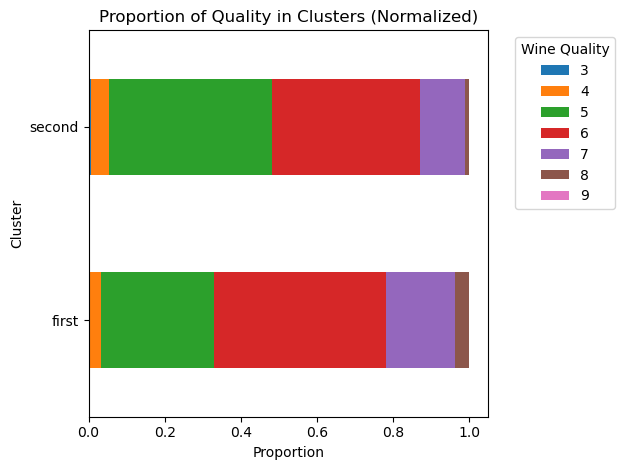

In [601]:
pca_cross_quality_normalized = pca_cross_quality.div(pca_cross_quality.sum(axis=0), axis=1)

pca_cross_quality_normalized.T.plot(kind='barh', stacked=True)
plt.title('Proportion of Quality in Clusters (Normalized)')
plt.ylabel('Cluster')
plt.xlabel('Proportion')
plt.legend(title='Wine Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

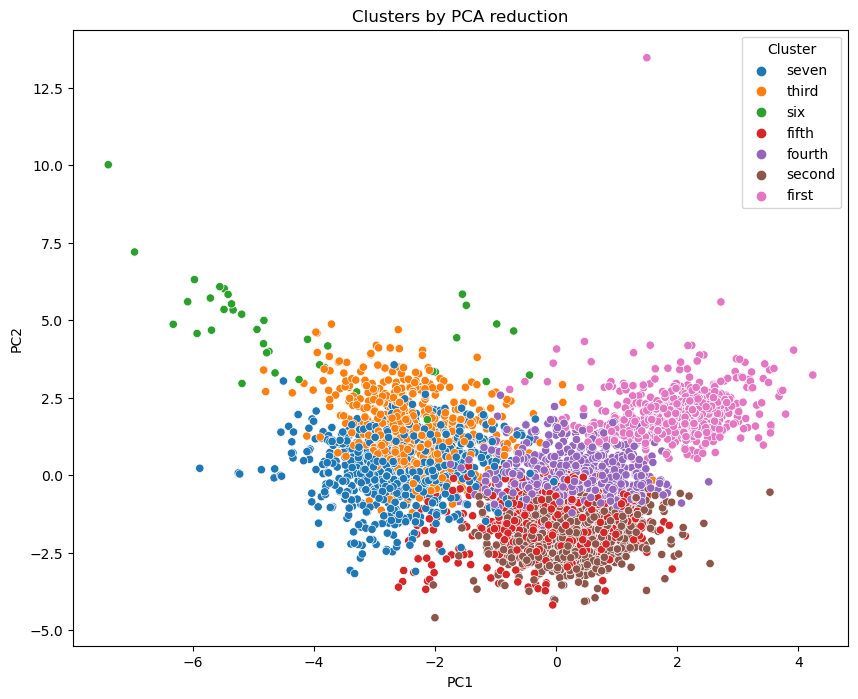

In [602]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 45)
cluster_final = kmeans.fit(pca_result)

df_plot1 = pd.concat([df.reset_index(drop = True), pd.DataFrame(pca_result)],axis = 1)
df_plot1.columns.values[-6:] = ['PC1','PC2','PC3','PC4','PC5','PC6']
df_plot1['Cluster'] = cluster_final.labels_

df_plot1['Cluster'] = df_plot1['Cluster'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth',5:'six',6:'seven',8:'eight'})

plt.figure(figsize = (10,8))
sns.scatterplot(data=df_plot1, x="PC1", y="PC2", hue="Cluster")
plt.title("Clusters by PCA reduction")
plt.show()

In [603]:
pca_cross1 = pd.crosstab(df_plot1['color'], df_plot1['Cluster'])
pca_cross1

Cluster  fifth  first  fourth  second  seven  six  third
color                                                   
red         72      0      14       7    868   37    596
white      854    893     993    1127     48    5     19

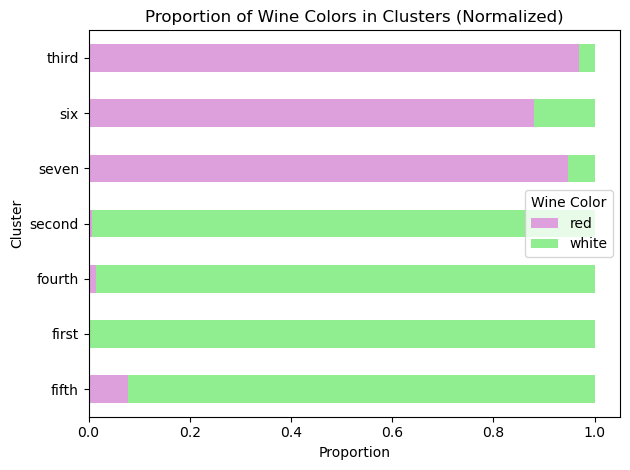

In [605]:
pca_cross_normalized1 = pca_cross1.div(pca_cross1.sum(axis=0), axis=1)

pca_cross_normalized1.T.plot(kind='barh', stacked=True, color=['plum', 'lightgreen'])
plt.title('Proportion of Wine Colors in Clusters (Normalized)')
plt.ylabel('Cluster')
plt.xlabel('Proportion')
plt.legend(title='Wine Color')
plt.tight_layout()
plt.show()

In [606]:
pca_cross_quality1 = pd.crosstab(df_plot1['quality'], df_plot1['Cluster'])
pca_cross_quality1

Cluster  fifth  first  fourth  second  seven  six  third
quality                                                 
3            2      2       5       2      7    1      4
4           23     21      57      23     62    2     14
5          171    381     399      98    468   26    187
6          423    378     428     532    337   12    261
7          257     94      94     400     40    1    135
8           49     17      23      76      2    0     14
9            1      0       1       3      0    0      0

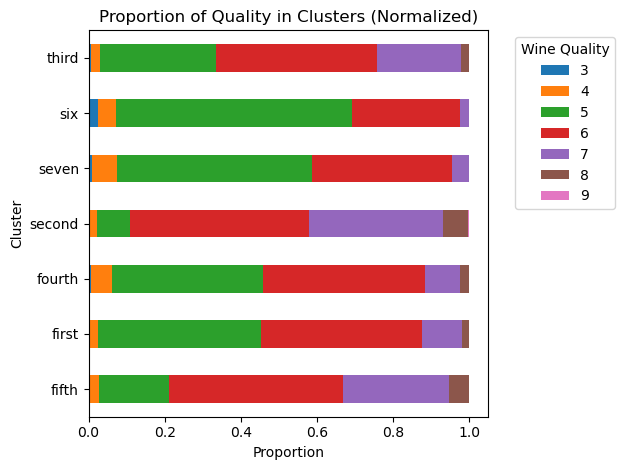

In [608]:
pca_cross_quality_normalized1 = pca_cross_quality1.div(pca_cross_quality1.sum(axis=0), axis=1)

pca_cross_quality_normalized1.T.plot(kind='barh', stacked=True)
plt.title('Proportion of Quality in Clusters (Normalized)')
plt.ylabel('Cluster')
plt.xlabel('Proportion')
plt.legend(title='Wine Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> ##### PCA + Clustering Summary:
> - Reducing with PCA and then clustering was able to differentiate the wine colors very well but performed very poorly in differentiating quality ratings

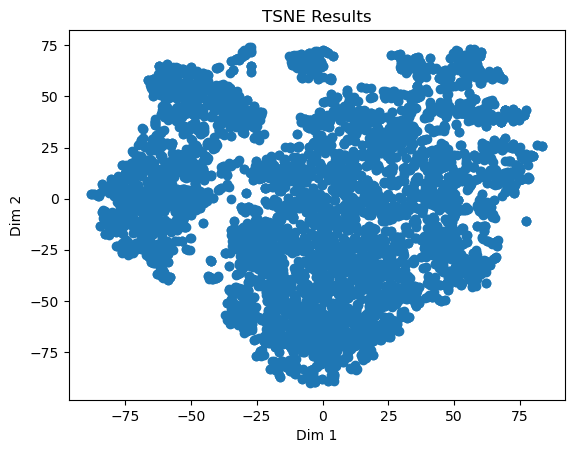

In [609]:
tsne = TSNE(n_components=2, init= 'pca', random_state = 45)

tsne_results = tsne.fit_transform(scaled_df)

plt.scatter(tsne_results[:,0], tsne_results[:,1])
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('TSNE Results')
plt.show()

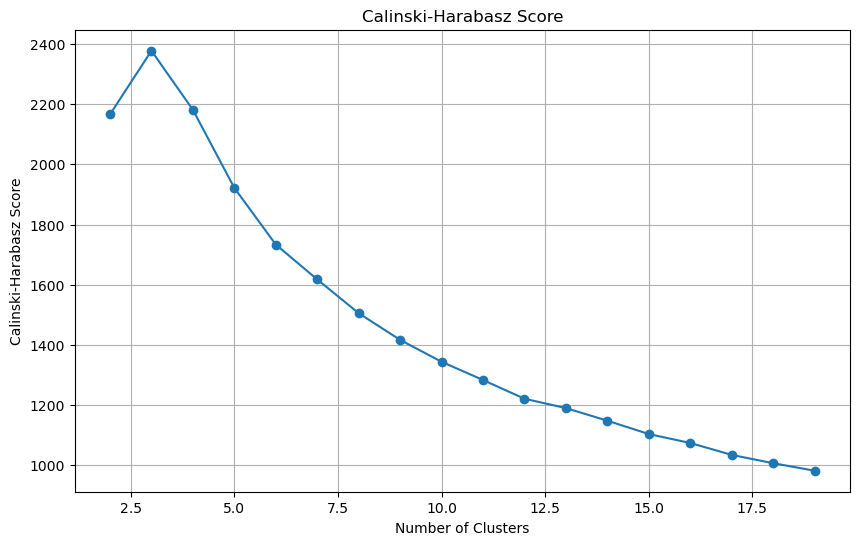

In [610]:
plt.figure(figsize=(10, 6))
plt.plot(ch_score_df["Number of clusters"], ch_score_df["CH score"], marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)
plt.show()

> Similar to PCA, taking 2 clusters again

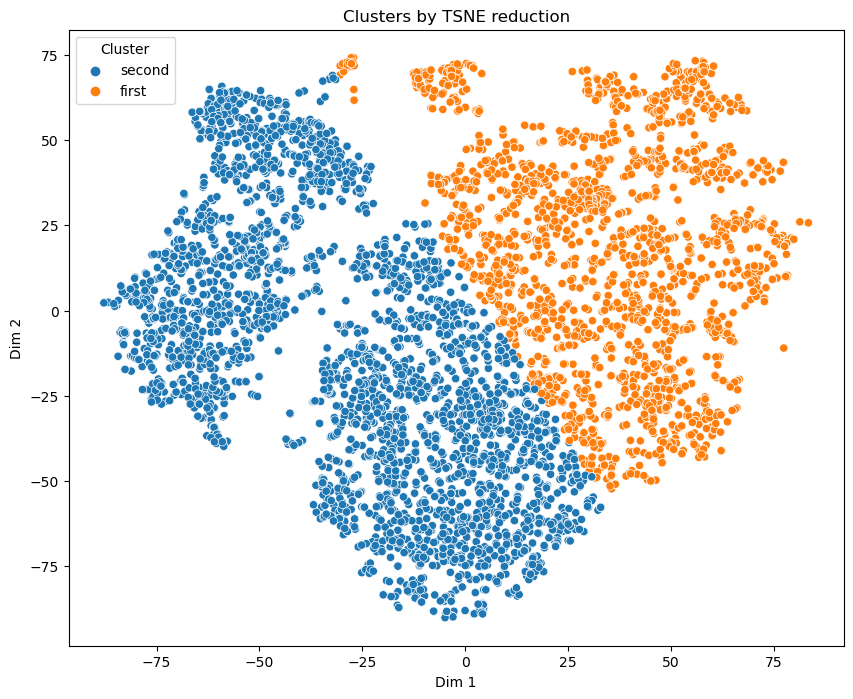

In [613]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 45)
cluster_final = kmeans.fit(tsne_results)

df_tsne_plot = pd.concat([df.reset_index(drop = True), pd.DataFrame(tsne_results)],axis = 1)
df_tsne_plot.columns.values[-2:] = ['Dim 1','Dim 2']
df_tsne_plot['Cluster'] = cluster_final.labels_

df_tsne_plot['Cluster'] = df_tsne_plot['Cluster'].map({0:'first',1:'second'})

df_tsne_plot

plt.figure(figsize = (10,8))
#sns.scatterplot(x,y,hue = df_plot['Cluster'], palette = ['g','r','c','m'])
sns.scatterplot(data=df_tsne_plot, x="Dim 1", y="Dim 2", hue="Cluster")
plt.title("Clusters by TSNE reduction")
plt.show()

In [614]:
tsne_cross = pd.crosstab(df_tsne_plot['color'], df_tsne_plot['Cluster'])
tsne_cross

Cluster  first  second
color                 
red         39    1560
white     2690    2208

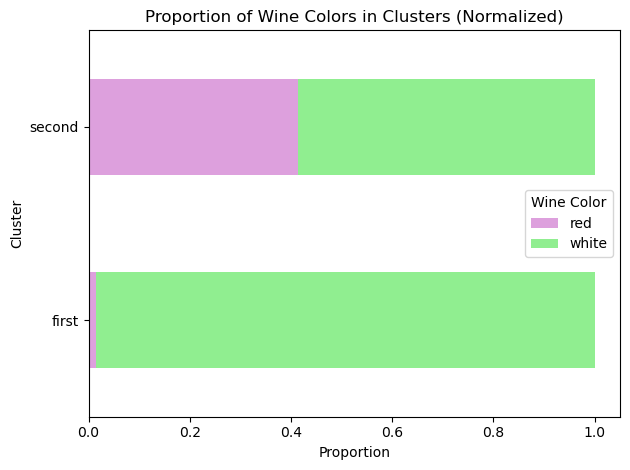

In [616]:
tsne_cross_normalized = tsne_cross.div(tsne_cross.sum(axis=0), axis=1)

tsne_cross_normalized.T.plot(kind='barh', stacked=True, color=['plum', 'lightgreen'])
plt.title('Proportion of Wine Colors in Clusters (Normalized)')
plt.ylabel('Cluster')
plt.xlabel('Proportion')
plt.legend(title='Wine Color')
plt.tight_layout()
plt.show()

In [617]:
tsne_cross_quality = pd.crosstab(df_tsne_plot['quality'], df_tsne_plot['Cluster'])
tsne_cross_quality

Cluster  first  second
quality               
3           13      17
4           71     145
5         1031    1107
6         1242    1594
7          310     769
8           61     132
9            1       4

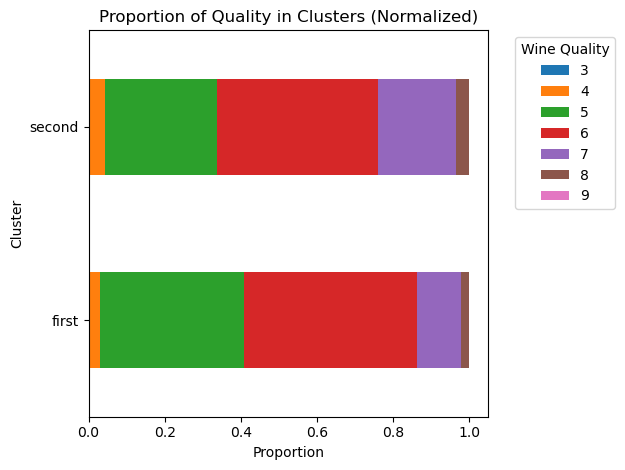

In [620]:
tsne_cross_quality_normalized = tsne_cross_quality.div(tsne_cross_quality.sum(axis=0), axis=1)

tsne_cross_quality_normalized.T.plot(kind='barh', stacked=True)
plt.title('Proportion of Quality in Clusters (Normalized)')
plt.ylabel('Cluster')
plt.xlabel('Proportion')
plt.legend(title='Wine Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> TSNE performs as well as PCA for color clustering. Increasing the number of clusters to see if it can match performance for quality ratings as well

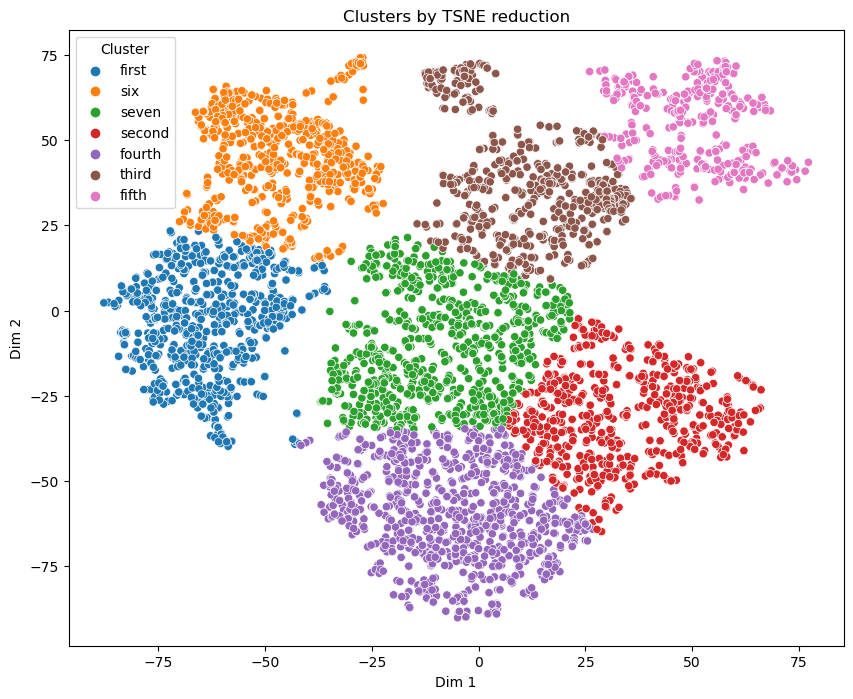

In [622]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 45)
cluster_final = kmeans.fit(tsne_results)

df_tsne_plot1 = pd.concat([df.reset_index(drop = True), pd.DataFrame(tsne_results)],axis = 1)
df_tsne_plot1.columns.values[-2:] = ['Dim 1','Dim 2']
df_tsne_plot1['Cluster'] = cluster_final.labels_

df_tsne_plot1['Cluster'] = df_tsne_plot1['Cluster'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth',5:'six',6:'seven',8:'eight'})

df_tsne_plot1

plt.figure(figsize = (10,8))
#sns.scatterplot(x,y,hue = df_plot['Cluster'], palette = ['g','r','c','m'])
sns.scatterplot(data=df_tsne_plot1, x="Dim 1", y="Dim 2", hue="Cluster")
plt.title("Clusters by TSNE reduction")
plt.show()

In [626]:
tsne_cross_quality1 = pd.crosstab(df_tsne_plot1['quality'], df_tsne_plot1['Cluster'])
tsne_cross_quality1

Cluster  fifth  first  fourth  second  seven  six  third
quality                                                 
3            2      7       3       4      1    4      2
4           13     51      18      36     50   17     22
5          244    431      78     206    314  260    370
6          204    330     484     379    452  310    322
7           82     56     407     138    164  152     33
8           17      6      88      34     24   14      3
9            0      0       4       0      0    0      0

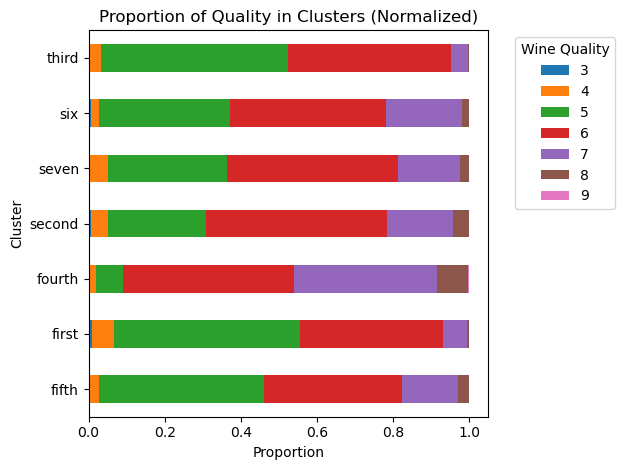

In [628]:
tsne_cross_quality_normalized1 = tsne_cross_quality1.div(tsne_cross_quality1.sum(axis=0), axis=1)

tsne_cross_quality_normalized1.T.plot(kind='barh', stacked=True)
plt.title('Proportion of Quality in Clusters (Normalized)')
plt.ylabel('Cluster')
plt.xlabel('Proportion')
plt.legend(title='Wine Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> For the given chemical properties, both linear and non-linear reduction techniques perform well on identifying the color of the wine, but struggle to cluster the quality ratings correctly. 

***
***
***

## **`Problem 6`**
***

<Axes: >

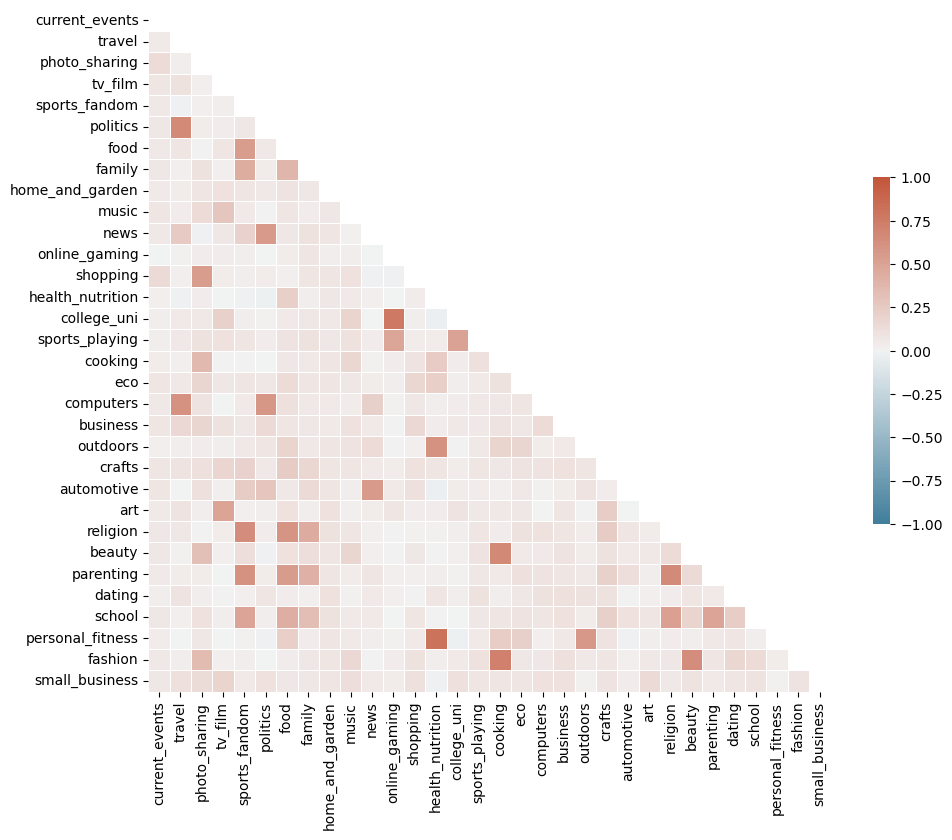

In [650]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.manifold import TSNE
from sklearn.metrics import calinski_harabasz_score
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

df = pd.read_csv('social_marketing.csv')
# df.head(10)

# df.columns
# df['adult'].sum()
# df['spam'].sum()
# df['chatter'].sum()

columns_to_drop = [df.columns[0]] + [df.columns[1]] + [df.columns[5]] + df.columns[-2:].to_list()
new_df = df.drop(columns=columns_to_drop)

# new_df.columns

corr = new_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


> - Some strong postive correlations between variables are seen, PCA can be performed to reduce the impact of multicollinear variables before doing clustering.

Explained Variance Ratios: [0.13764077 0.08661466 0.07912116 0.07306905 0.06727866 0.0515825
 0.04622037 0.04305412 0.03466668 0.03083216 0.02915864 0.02888014
 0.02758008 0.02652177 0.02576204 0.02235648 0.0204464  0.01775757
 0.01511552 0.01476296 0.01336172 0.01318794 0.01276651 0.01247824
 0.0119079  0.01122207 0.01103977 0.00951854 0.00737525 0.00713723
 0.00601181 0.00557128]


Text(0, 0.5, 'Cumulative Variance')

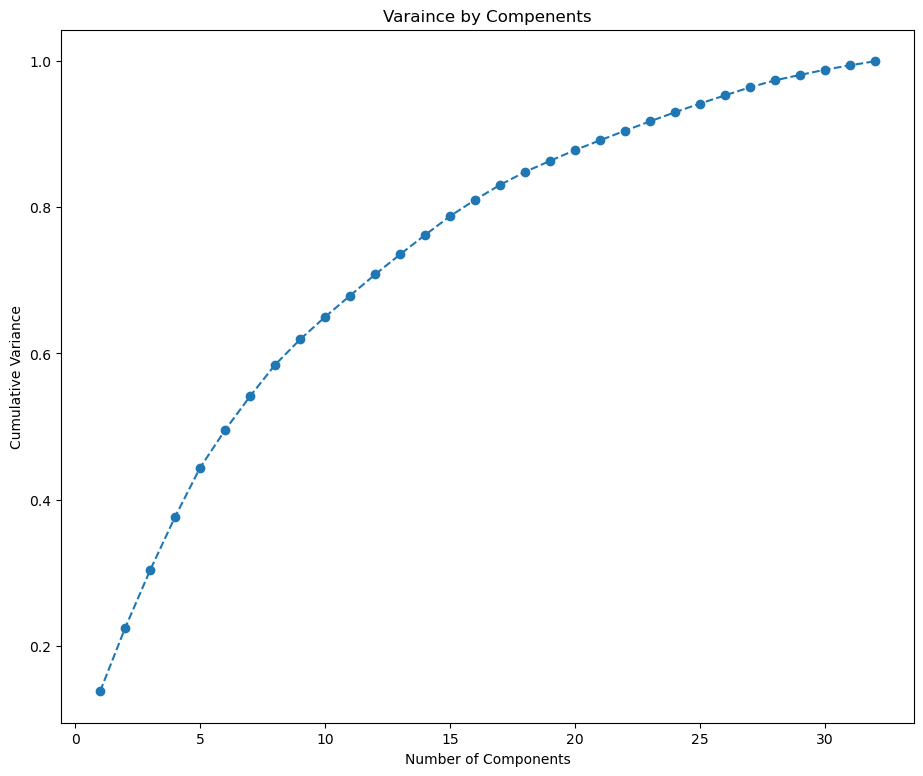

In [651]:
scale = StandardScaler()
scaled_df = scale.fit_transform(new_df)

pca = PCA()
pca.fit(scaled_df)

print("Explained Variance Ratios:",pca.explained_variance_ratio_)

# new_df.shape\

plt.figure(figsize = (11,9))
plt.plot(range(1,33),pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title("Varaince by Compenents")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")


> - The cumulative variance is above 80% when we consider 17 components, hence taking 17 components for PCA

Explained Variance Ratios: [0.13764077 0.08661466 0.07912116 0.07306905 0.06727866 0.0515825
 0.04622034 0.04305407 0.03466617 0.0308317  0.02915676 0.02887831
 0.02757979 0.0265215  0.02576169 0.02235465 0.02044448]


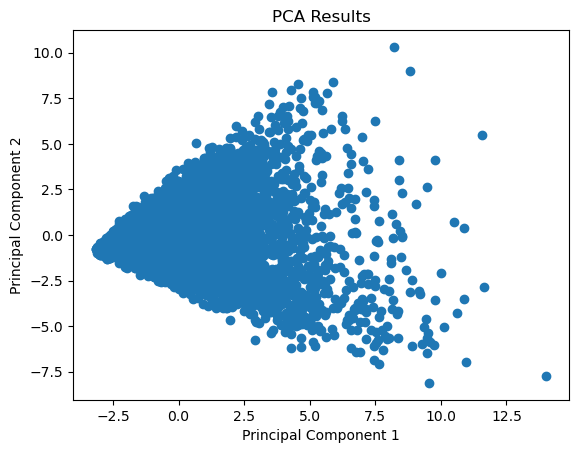

In [652]:
pca = PCA(n_components = 17)
pca_result = pca.fit_transform(scaled_df)
print("Explained Variance Ratios:",pca.explained_variance_ratio_)

plt.scatter(pca_result[:,0], pca_result[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

In [653]:
ch_score_df = pd.DataFrame(columns=["Number of clusters", "CH score"])
wcss_scores = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 45)
    cluster = kmeans.fit(pca_result)
    labels = cluster.labels_
    wcss_scores.append(kmeans.inertia_)
    
    if len(set(labels)) > 1:
        ch_score = calinski_harabasz_score(pca_result, labels)
        iteration_df = pd.DataFrame({"Number of clusters": [i], "CH score": [ch_score]})
        ch_score_df = pd.concat([ch_score_df, iteration_df], ignore_index=True)

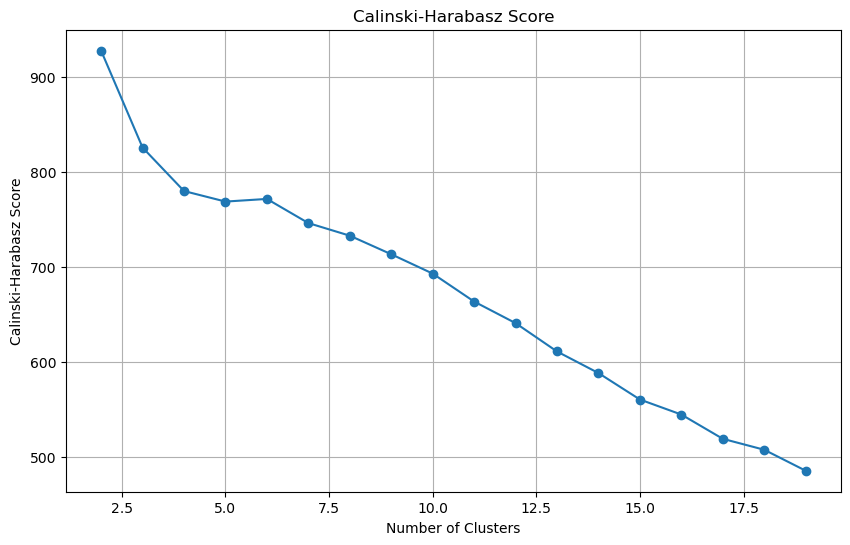

In [654]:
plt.figure(figsize=(10, 6))
plt.plot(ch_score_df["Number of clusters"], ch_score_df["CH score"], marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)
plt.show()

> - We see a sharp spike at 6 clusters in the CH Score graph

In [655]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 45)
kmeans.fit(pca_result)
pca_result[0]

array([ 1.20602105,  1.44916537, -2.10947896,  3.8907657 ,  2.4205154 ,
       -0.30330781, -0.96694768, -0.48185162,  0.34523821, -0.67653523,
       -1.34977275, -1.25036637, -1.22562451,  0.26322585, -0.47332102,
        0.22607877,  0.06559689])

In [656]:
df_plot = pd.concat([df.reset_index(drop = True), pd.DataFrame(pca_result)],axis = 1)
df_plot.columns.values[-17:] = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17']
df_plot['Cluster'] = kmeans.labels_

In [657]:
df_plot.head()
print(set(kmeans.labels_))

{0, 1, 2, 3, 4, 5}


In [658]:
df_plot['Cluster'] = df_plot['Cluster'].map({0:'one',1:'two',2:'three',3:'four',4:'five',5:'six'})

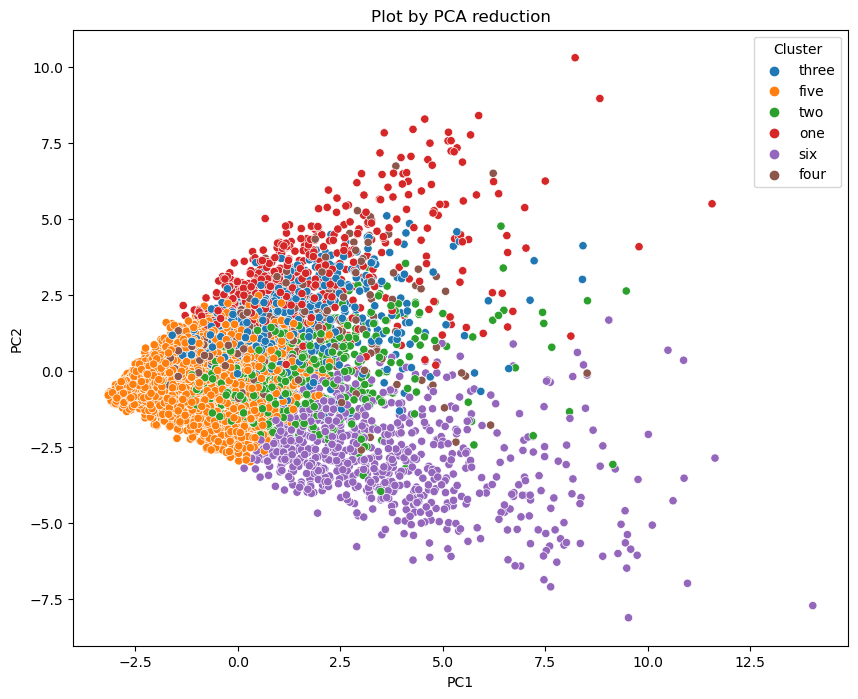

In [659]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=df_plot, x="PC1", y="PC2", hue="Cluster")
plt.title("Plot by PCA reduction")
plt.show()

In [660]:
new_df['Cluster'] = kmeans.labels_

In [661]:
df_cus1 = new_df[new_df['Cluster'] == 0]
df_cus2 = new_df[new_df['Cluster'] == 1]
df_cus3 = new_df[new_df['Cluster'] == 2]
df_cus4 = new_df[new_df['Cluster'] == 3]
df_cus5 = new_df[new_df['Cluster'] == 4]
df_cus6 = new_df[new_df['Cluster'] == 5]

df_cus1 = df_cus1.drop(df_cus1.columns[-1], axis=1)
df_cus2 = df_cus2.drop(df_cus2.columns[-1], axis=1)
df_cus3 = df_cus3.drop(df_cus3.columns[-1], axis=1)
df_cus4 = df_cus4.drop(df_cus4.columns[-1], axis=1)
df_cus5 = df_cus5.drop(df_cus5.columns[-1], axis=1)
df_cus6 = df_cus6.drop(df_cus6.columns[-1], axis=1)

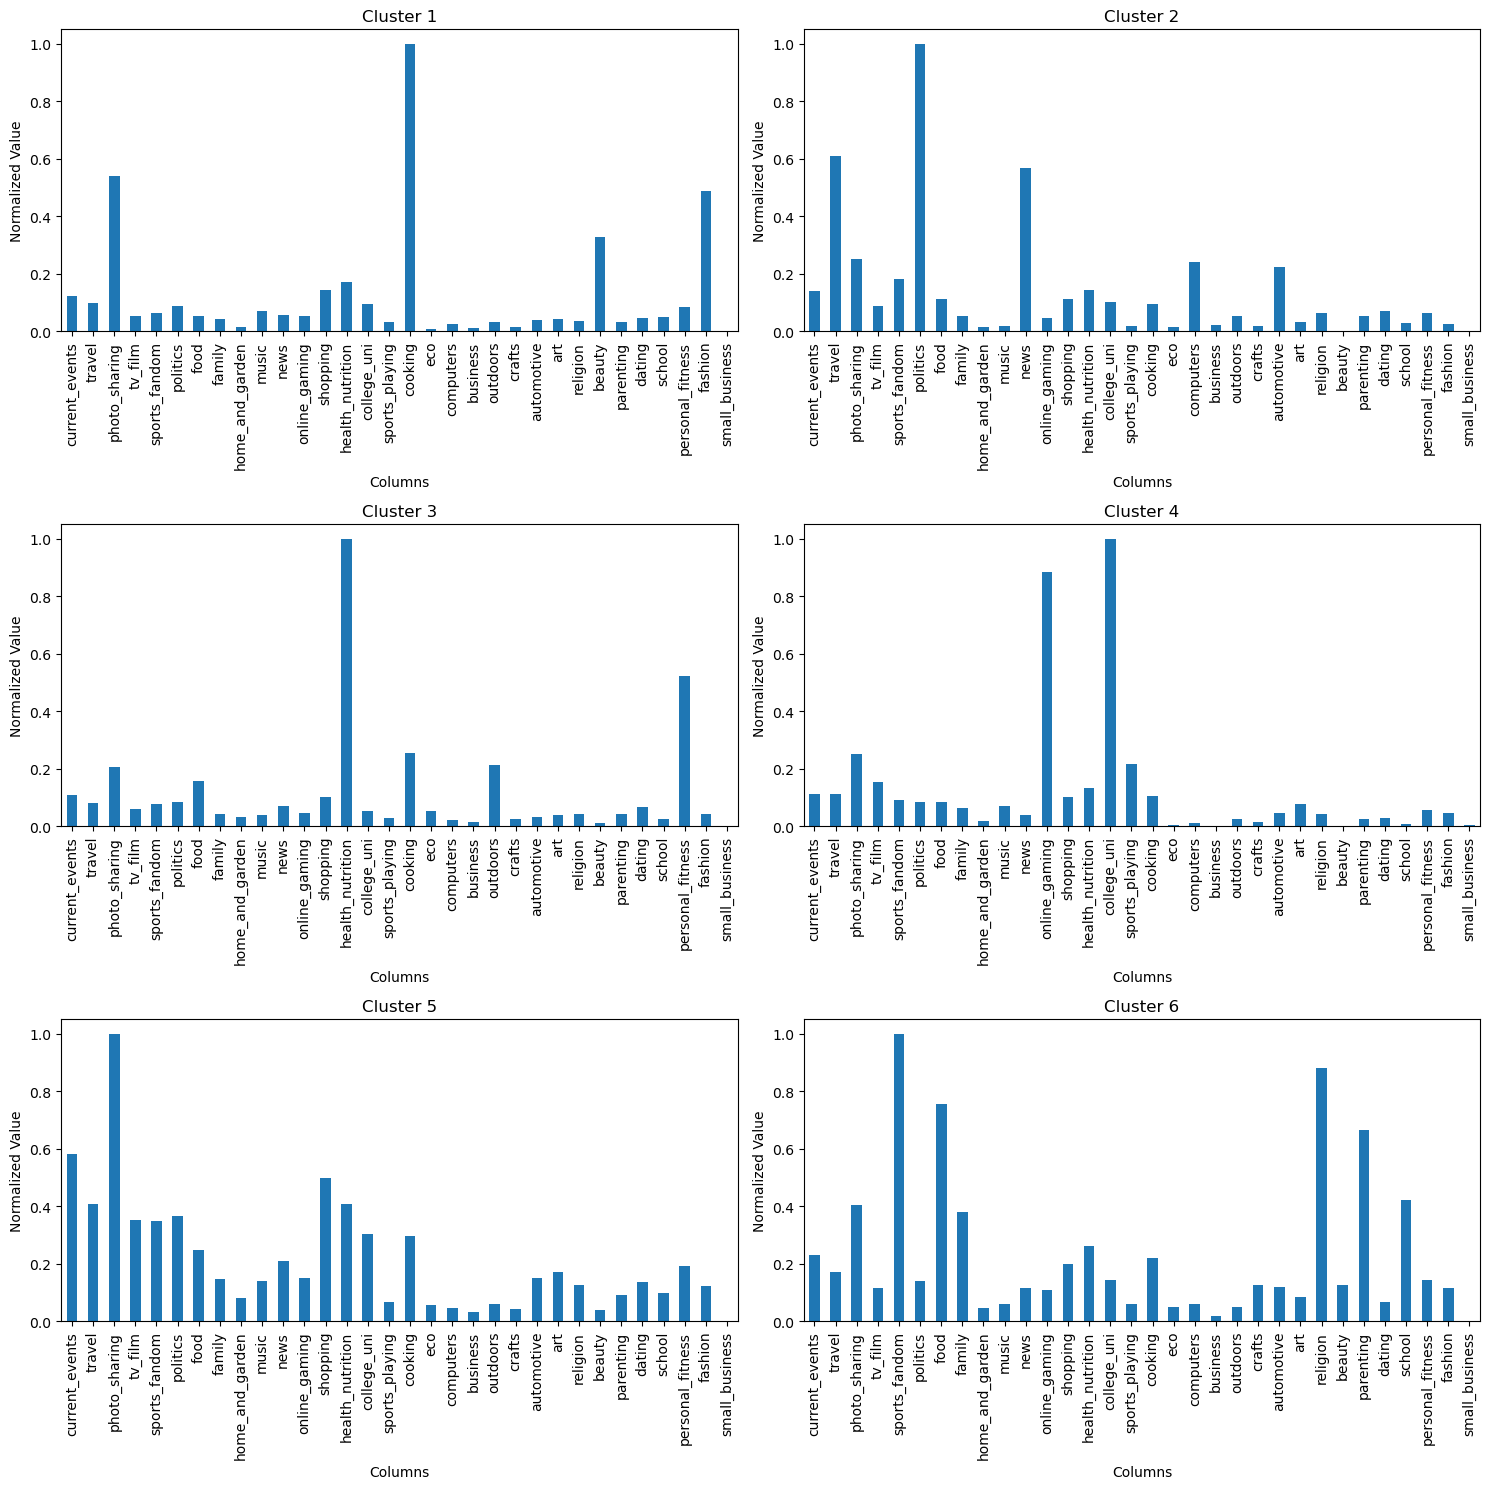

In [662]:
subset_list = [df_cus1, df_cus2, df_cus3, df_cus4,df_cus5,df_cus6]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

scaler = MinMaxScaler()

for i, df_cus in enumerate(subset_list):
    ax = axes[i // 2, i % 2]
    column_sums = df_cus.sum()
    normalized_values = scaler.fit_transform(column_sums.values.reshape(-1, 1))
    normalized_column_sums = pd.Series(normalized_values.flatten(), index=column_sums.index)
    normalized_column_sums.plot(kind='bar', ax=ax)
    ax.set_title(f'Cluster {i + 1}')
    ax.set_xlabel('Columns')
    ax.set_ylabel('Normalized Value')

plt.tight_layout()
plt.show()

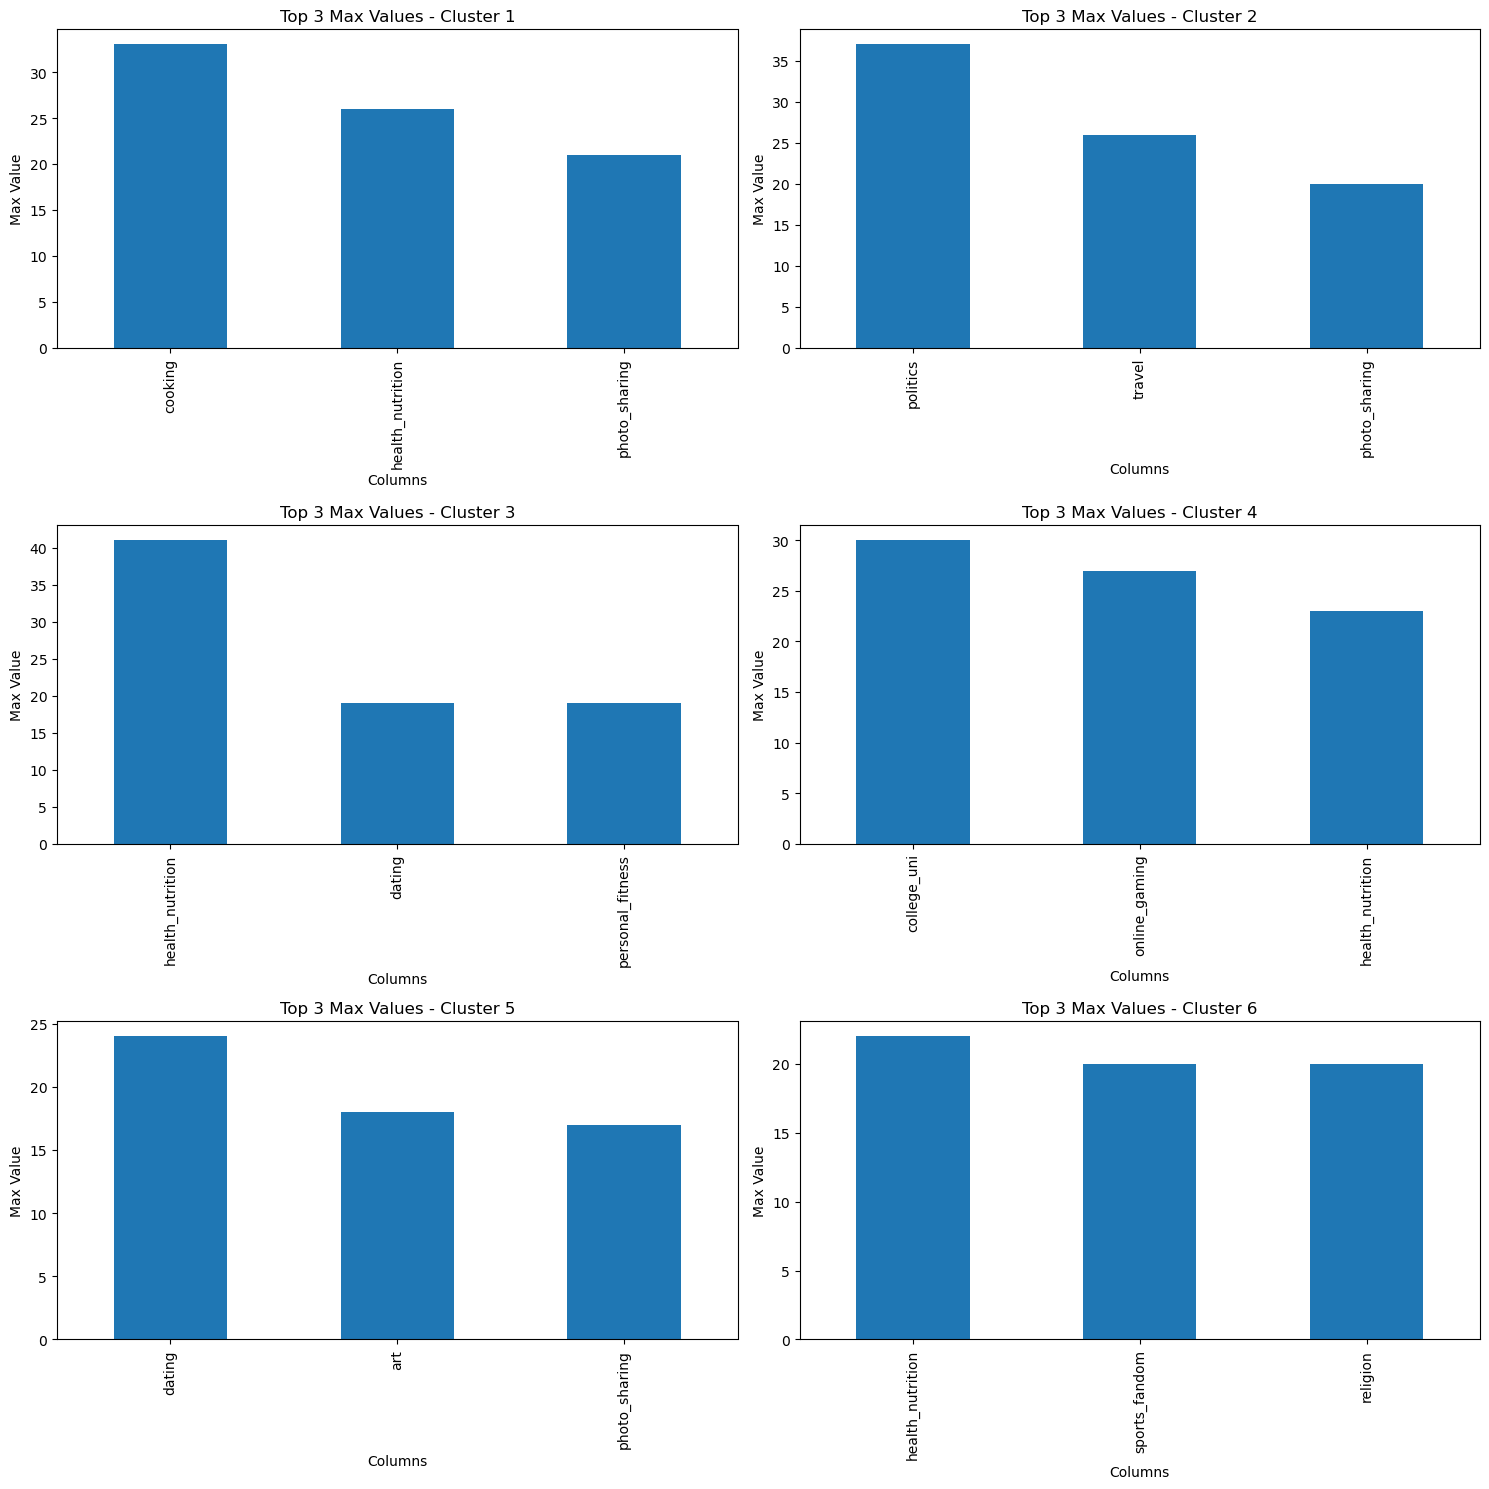

In [663]:
subset_list = [df_cus1, df_cus2, df_cus3, df_cus4,df_cus5,df_cus6]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, df_cus in enumerate(subset_list):
    ax = axes[i // 2, i % 2]
    # Get the top 5 maximum values from each column in the DataFrame
    top_5_max_values = df_cus.max().nlargest(3)
    # Plot the top 5 maximum values as a bar chart
    top_5_max_values.plot(kind='bar', ax=ax)
    ax.set_title(f'Top 3 Max Values - Cluster {i + 1}')
    ax.set_xlabel('Columns')
    ax.set_ylabel('Max Value')

plt.tight_layout()
plt.show()

> - We can infer that first,second, fifth cluster represents people who care a lot about health and fitness, mostly likely to be well-educated people and middle-aged people who care about current events; the third,fourth and sixth cluster represents college/high school students who are into social media, dating, sports and fitness.

> - Marketing Strategy for Each Group:
> -  Group 1 (Cluster 1, 2, 5): 
> - Suggest that the company explore the possibility of establishing partnerships with reputable health-oriented food brands that integrate the company's products into their offerings. Additionally, the company could venture into collaborations with acclaimed chefs and prominent fitness models to enhance the promotion of their products. Such a strategic initiative is likely to lead to heightened brand visibility and engagement within the consumer base.
> -  Group 2 (Cluster 3, 4, 6): 
The company should launch social media campaigns to attract the teenagers and young people, by colloborating with gaming youtube channel or actors to promote their products. Additionaly, the company must post their product advertisments in dating apps, news channel, and art forums to attract new customers.

***
***
***

## **`Problem 7`**
***

In [644]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import random
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
warnings.filterwarnings("ignore")



nltk.download('punkt')

def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

train_texts, train_labels = read_data_from_directory("ReutersC50/C50train")
test_texts, test_labels = read_data_from_directory("ReutersC50/C50test")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [645]:
# word_tokenize(train_texts[0])

['The',
 'Internet',
 'may',
 'be',
 'overflowing',
 'with',
 'new',
 'technology',
 'but',
 'crime',
 'in',
 'cyberspace',
 'is',
 'still',
 'of',
 'the',
 'old-fashioned',
 'variety',
 '.',
 'The',
 'National',
 'Consumers',
 'League',
 'said',
 'Wednesday',
 'that',
 'the',
 'most',
 'popular',
 'scam',
 'on',
 'the',
 'Internet',
 'was',
 'the',
 'pyramid',
 'scheme',
 ',',
 'in',
 'which',
 'early',
 'investors',
 'in',
 'a',
 'bogus',
 'fund',
 'are',
 'paid',
 'off',
 'with',
 'deposits',
 'of',
 'later',
 'investors',
 '.',
 'The',
 'league',
 ',',
 'a',
 'non-profit',
 'consumer',
 'advocacy',
 'group',
 ',',
 'tracks',
 'web',
 'scams',
 'through',
 'a',
 'site',
 'it',
 'set',
 'up',
 'on',
 'the',
 'world',
 'wide',
 'web',
 'in',
 'February',
 'called',
 'Internet',
 'Fraud',
 'Watch',
 'at',
 'http',
 ':',
 '//www.fraud.org',
 '.',
 'The',
 'site',
 ',',
 'which',
 'collects',
 'reports',
 'directly',
 'from',
 'consumers',
 ',',
 'has',
 'been',
 'widely',
 'praised',
 '

In [647]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens



print(f"Total number of training documents: {len(train_texts)}")
print(f"Total number of test documents: {len(test_texts)}")

train_doc_lengths = [len(preprocess_text(text)) for text in train_texts]
test_doc_lengths = [len(preprocess_text(text)) for text in test_texts]

print(f"\nAverage document length in training set: {np.mean(train_doc_lengths)} words")
print(f"Minimum document length in training set: {np.min(train_doc_lengths)} words")
print(f"Maximum document length in training set: {np.max(train_doc_lengths)} words")
print(f"\nAverage document length in test set: {np.mean(test_doc_lengths)} words")
print(f"Minimum document length in test set: {np.min(test_doc_lengths)} words")
print(f"Maximum document length in test set: {np.max(test_doc_lengths)} words")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total number of training documents: 2500
Total number of test documents: 2500

Average document length in training set: 328.4308 words
Minimum document length in training set: 33 words
Maximum document length in training set: 957 words

Average document length in test set: 333.2568 words
Minimum document length in test set: 42 words
Maximum document length in test set: 934 words



Most common words across the training set:
said: 19856
's: 14872
'': 13882
``: 13712
year: 6146
compani: 5651
would: 5237
percent: 5211
million: 4942
market: 4629


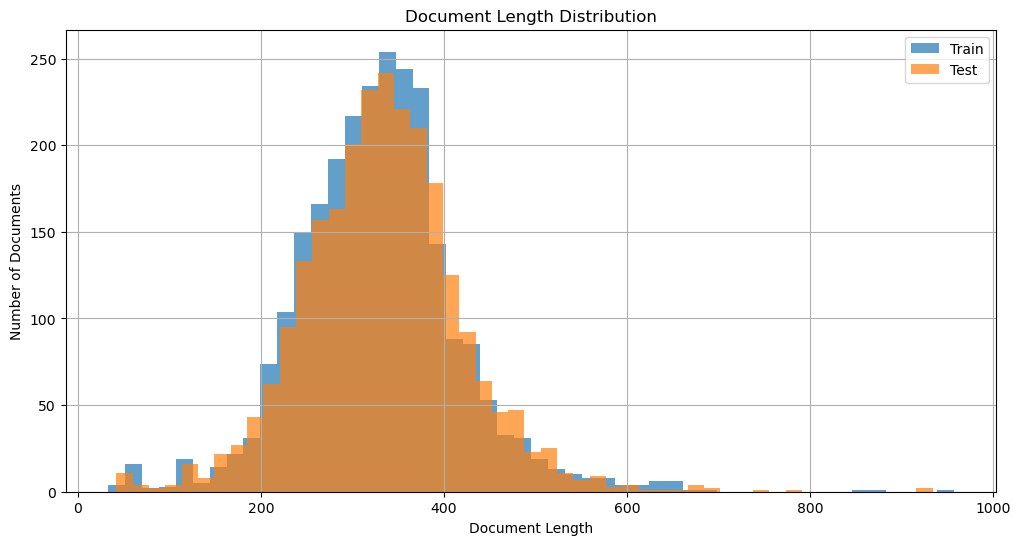

In [648]:
all_tokens = [token for text in train_texts for token in preprocess_text(text)]
common_tokens = Counter(all_tokens).most_common(10)
print("\nMost common words across the training set:")
for token, freq in common_tokens:
    print(f"{token}: {freq}")

plt.figure(figsize=(12, 6))
plt.hist(train_doc_lengths, bins=50, alpha=0.7, label='Train')
plt.hist(test_doc_lengths, bins=50, alpha=0.7, label='Test')
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Number of Documents')
plt.legend()
plt.grid(True)
plt.show()

In [664]:
vectorizer = CountVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
train_dtm = vectorizer.fit_transform(train_texts)
test_dtm = vectorizer.transform(test_texts)

selected_authors = random.sample(list(set(train_labels)), 2)
selected_texts = random.sample(list(set(train_texts)), 2)

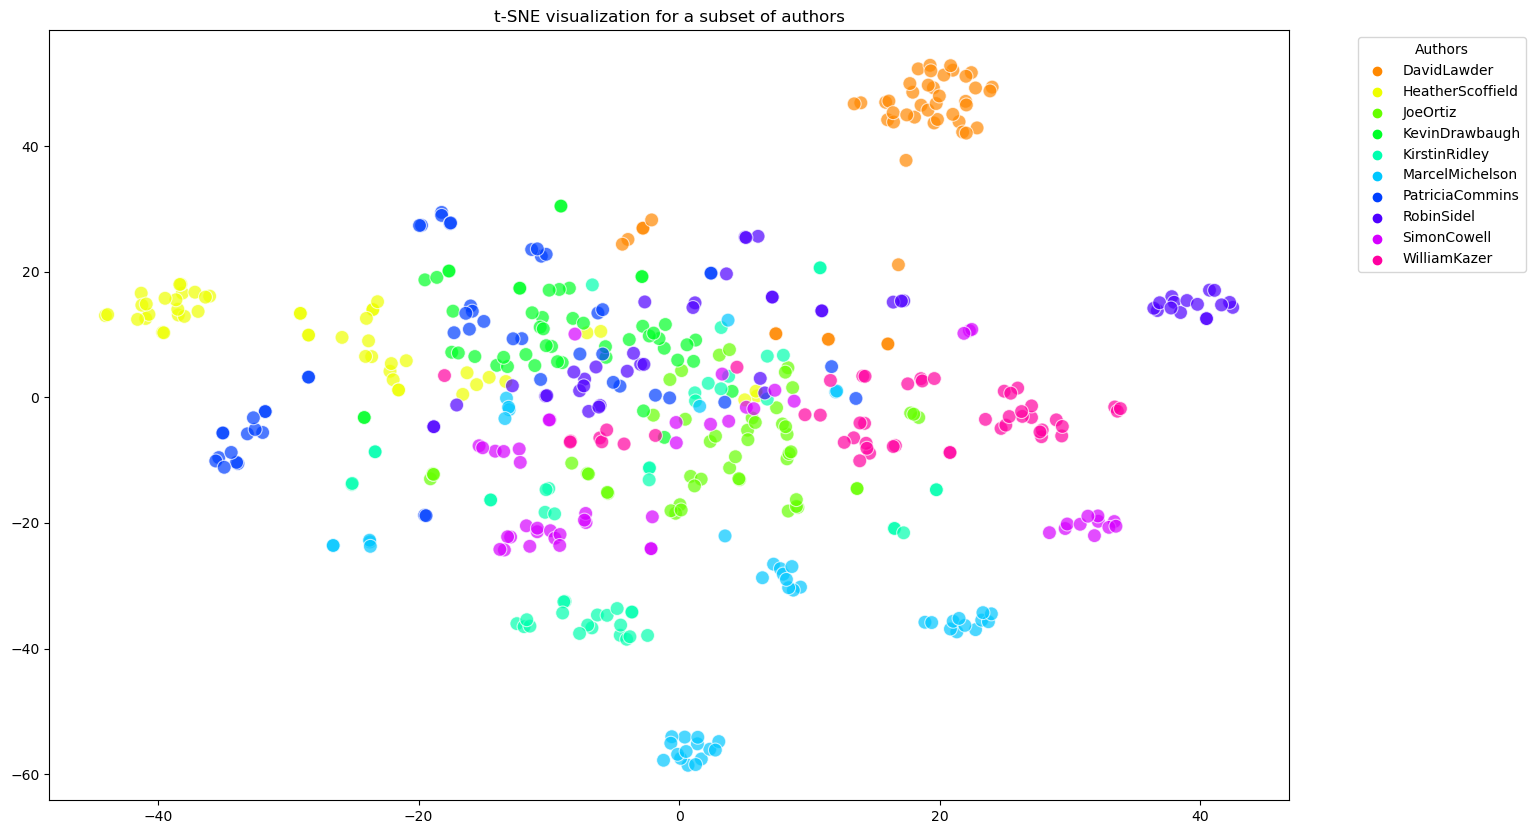

In [665]:
unique_authors = list(set(train_labels))
selected_authors = random.sample(unique_authors, 10)

filtered_indices = [i for i, label in enumerate(train_labels) if label in selected_authors]
filtered_texts = [train_texts[i] for i in filtered_indices]
filtered_labels = [train_labels[i] for i in filtered_indices]
filtered_dtm = train_dtm[filtered_indices]

pca = PCA(n_components=100)
reduced_data_pca = pca.fit_transform(filtered_dtm.toarray())  # Convert sparse matrix to dense matrix
tsne = TSNE(n_components=2, perplexity=20)
tsne_results = tsne.fit_transform(reduced_data_pca)

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=filtered_labels,
    palette=sns.color_palette("hsv", len(selected_authors)),
    alpha=0.7,
    s=100
)
plt.title('t-SNE visualization for a subset of authors')
plt.legend(title='Authors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [666]:
print("Creating a TF-IDF matrix for the 2500 documents with 2500 max-features")

vectorizer_train = TfidfVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
tfidf_train = vectorizer_train.fit_transform(train_texts)
tfidf_test = vectorizer_train.transform(test_texts)

# Convert sparse TF-IDF matrices to dense DataFrames
train_dense_matrix = tfidf_train.toarray()
train_set = pd.DataFrame(train_dense_matrix, columns=vectorizer_train.get_feature_names_out())

test_dense_matrix = tfidf_test.toarray()
test_set = pd.DataFrame(test_dense_matrix, columns=vectorizer_train.get_feature_names_out())

Creating a TF-IDF matrix for the 2500 documents with 2500 max-features


Accuracy: 0.6176

Top 5 labels with the worst predictions:

ScottHillis
TanEeLyn
JanLopatka
WilliamKazer
DarrenSchuettler


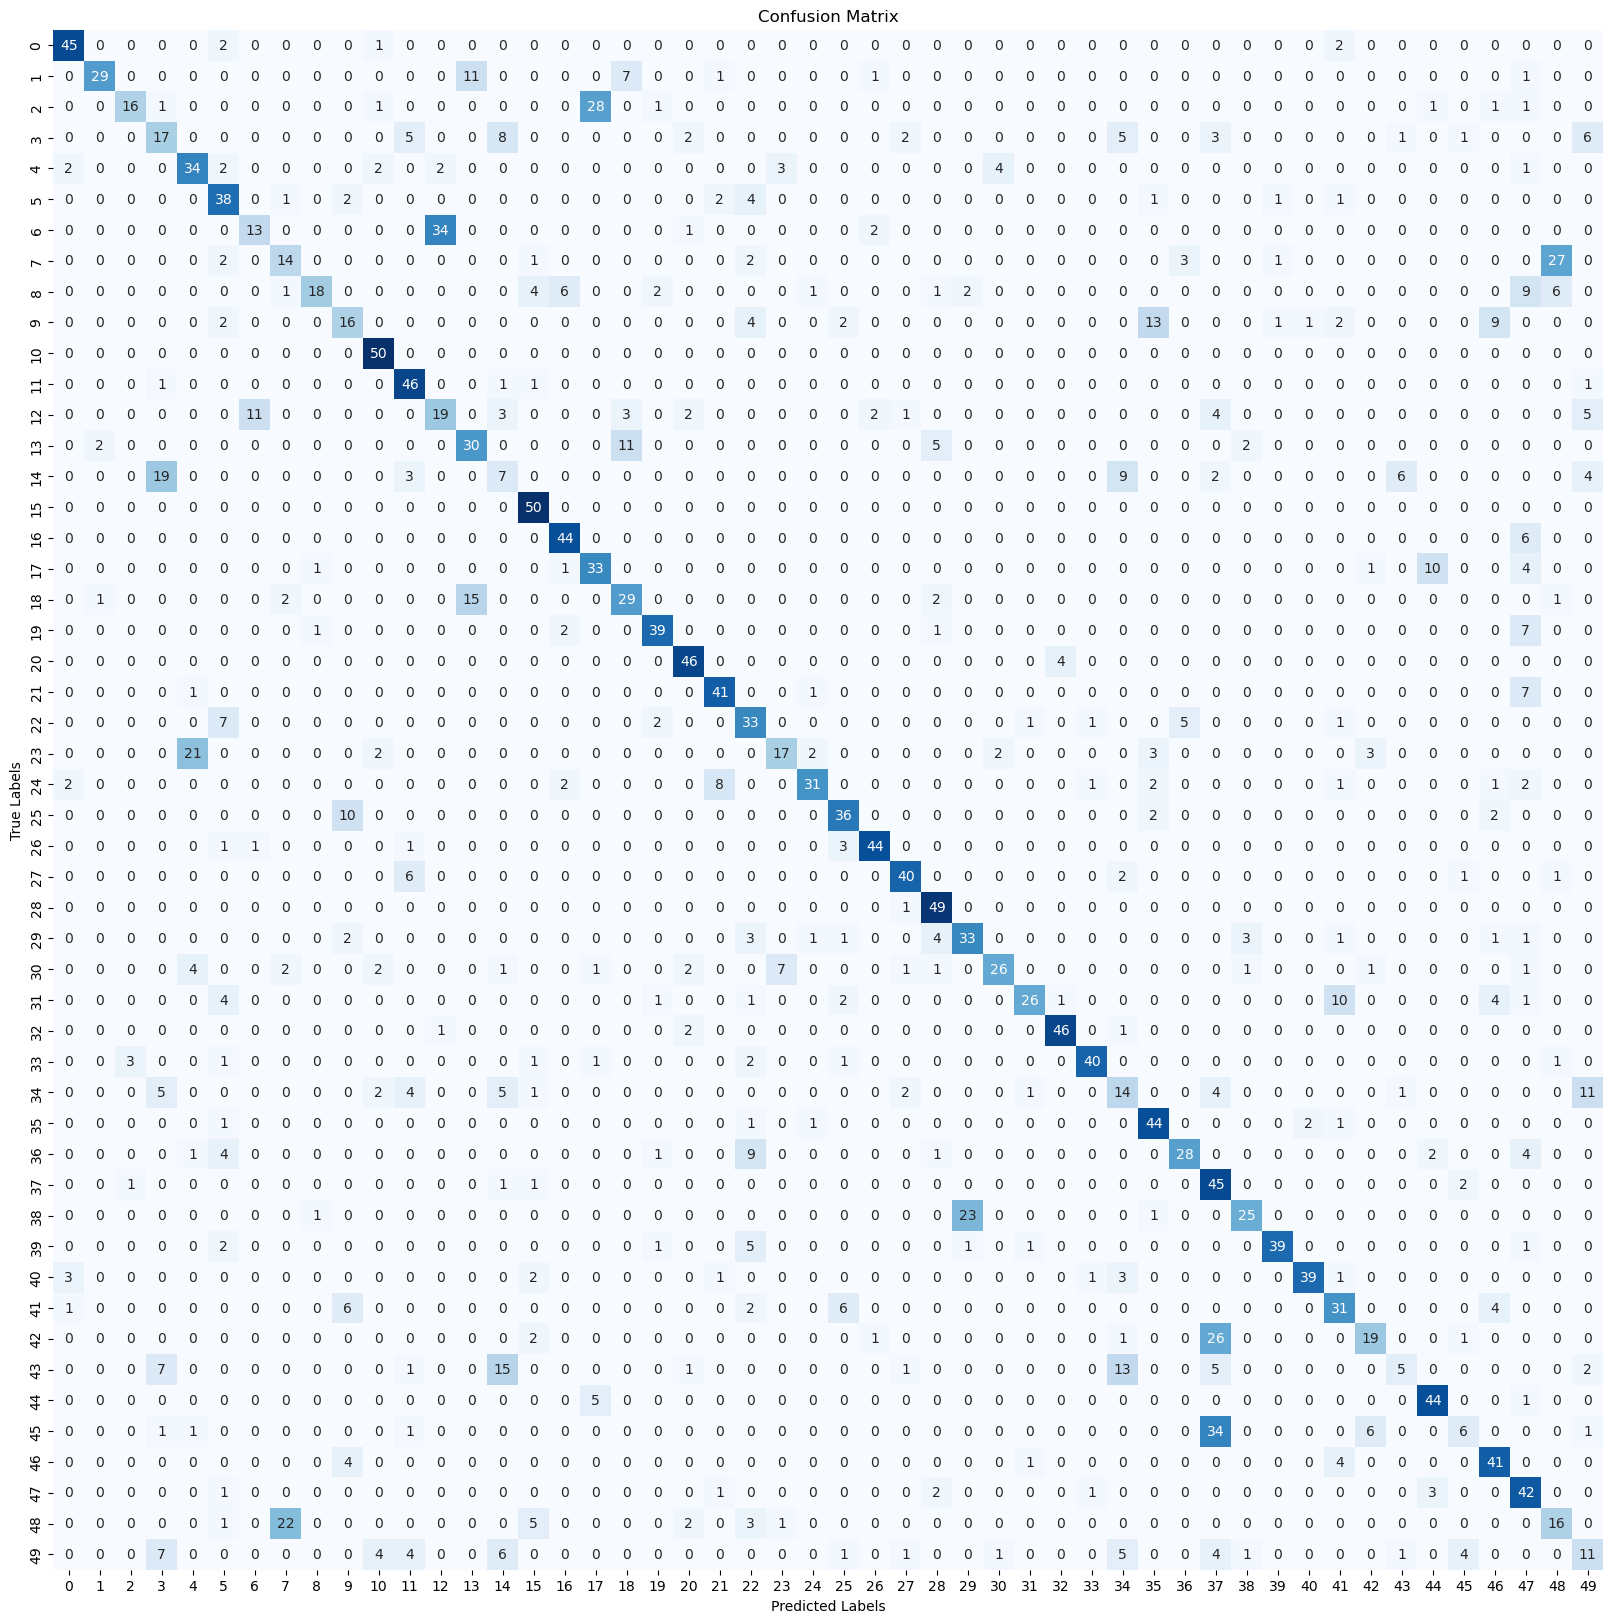

In [667]:
# Initialize the Naive Bayes model
naive_bayes_model = MultinomialNB()

# Fit the model on the training data
naive_bayes_model.fit(train_set, train_labels)

# Predict labels for the test data
predicted_labels = naive_bayes_model.predict(test_set)

# Calculate the accuracy of the model
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

incorrect_predictions_sum = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
worst_labels_indices = incorrect_predictions_sum.argsort()[-5:][::-1]
worst_labels = [pd.Series(test_labels).unique()[i] for i in worst_labels_indices]

print("\nTop 5 labels with the worst predictions:\n")
for label in worst_labels:
    print(label)

plt.figure(figsize=(20, 20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [668]:
print("""\nRunning a cross-validation exercise for Random Forest model.
Trying to classify the author of the document with the TF-IDF matrix as the feature.
Defining a hyperparameter space and perform CV with 5 folds on the train set to select the best hyperparameter combination.""")

best_hyperparameters = {'Tree Depth': None, 'Number of Trees': None, 'Max Features': None, 'Accuracy Score': 0.0}

run_rf = True
if run_rf:
    from sklearn.model_selection import cross_val_score, KFold

    kfold = KFold(n_splits=5, shuffle=True)

    RF_tracking_df = pd.DataFrame(columns=["Tree Depth", "Number of Trees", "Max Features", "Accuracy Score"])

    for max_depth in [10,5]:
        for n_estimators in [200]:
            for mtry in ["sqrt",50 ,100]:
                model_rf = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_depth=max_depth, max_features=mtry)

                scores_rf = cross_val_score(model_rf, train_set, train_labels, cv=kfold)

                avg_accuracy = scores_rf.mean()
                print('Random Forest - Depth = {} Trees = {} Mtry = {} Accuracy = {}'.format(max_depth, n_estimators, mtry, round(avg_accuracy, 3)))

                new_row_df = pd.DataFrame([[max_depth, n_estimators, mtry, avg_accuracy]], columns=RF_tracking_df.columns)
                RF_tracking_df = pd.concat([RF_tracking_df, new_row_df], ignore_index=True)

                if avg_accuracy > best_hyperparameters['Accuracy Score']:
                    best_hyperparameters = {'Tree Depth': max_depth, 'Number of Trees': n_estimators, 'Max Features': mtry, 'Accuracy Score': avg_accuracy}

    RF_tracking_df.to_csv("RFBestParam.csv")

print("\nBest Hyperparameters:")
print(best_hyperparameters)

best_model_rf = RandomForestClassifier(n_estimators=best_hyperparameters['Number of Trees'], criterion='entropy',
                                       max_depth=best_hyperparameters['Tree Depth'],
                                       max_features=best_hyperparameters['Max Features'])
best_model_rf.fit(train_set, train_labels)


Running a cross-validation exercise for Random Forest model.
Trying to classify the author of the document with the TF-IDF matrix as the feature.
Defining a hyperparameter space and perform CV with 5 folds on the train set to select the best hyperparameter combination.
Random Forest - Depth = 10 Trees = 200 Mtry = sqrt Accuracy = 0.737
Random Forest - Depth = 10 Trees = 200 Mtry = 50 Accuracy = 0.746
Random Forest - Depth = 10 Trees = 200 Mtry = 100 Accuracy = 0.738
Random Forest - Depth = 5 Trees = 200 Mtry = sqrt Accuracy = 0.634
Random Forest - Depth = 5 Trees = 200 Mtry = 50 Accuracy = 0.632
Random Forest - Depth = 5 Trees = 200 Mtry = 100 Accuracy = 0.615

Best Hyperparameters:
{'Tree Depth': 10, 'Number of Trees': 200, 'Max Features': 50, 'Accuracy Score': 0.746}


RandomForestClassifier(criterion='entropy', max_depth=10, max_features=50,
                       n_estimators=200)

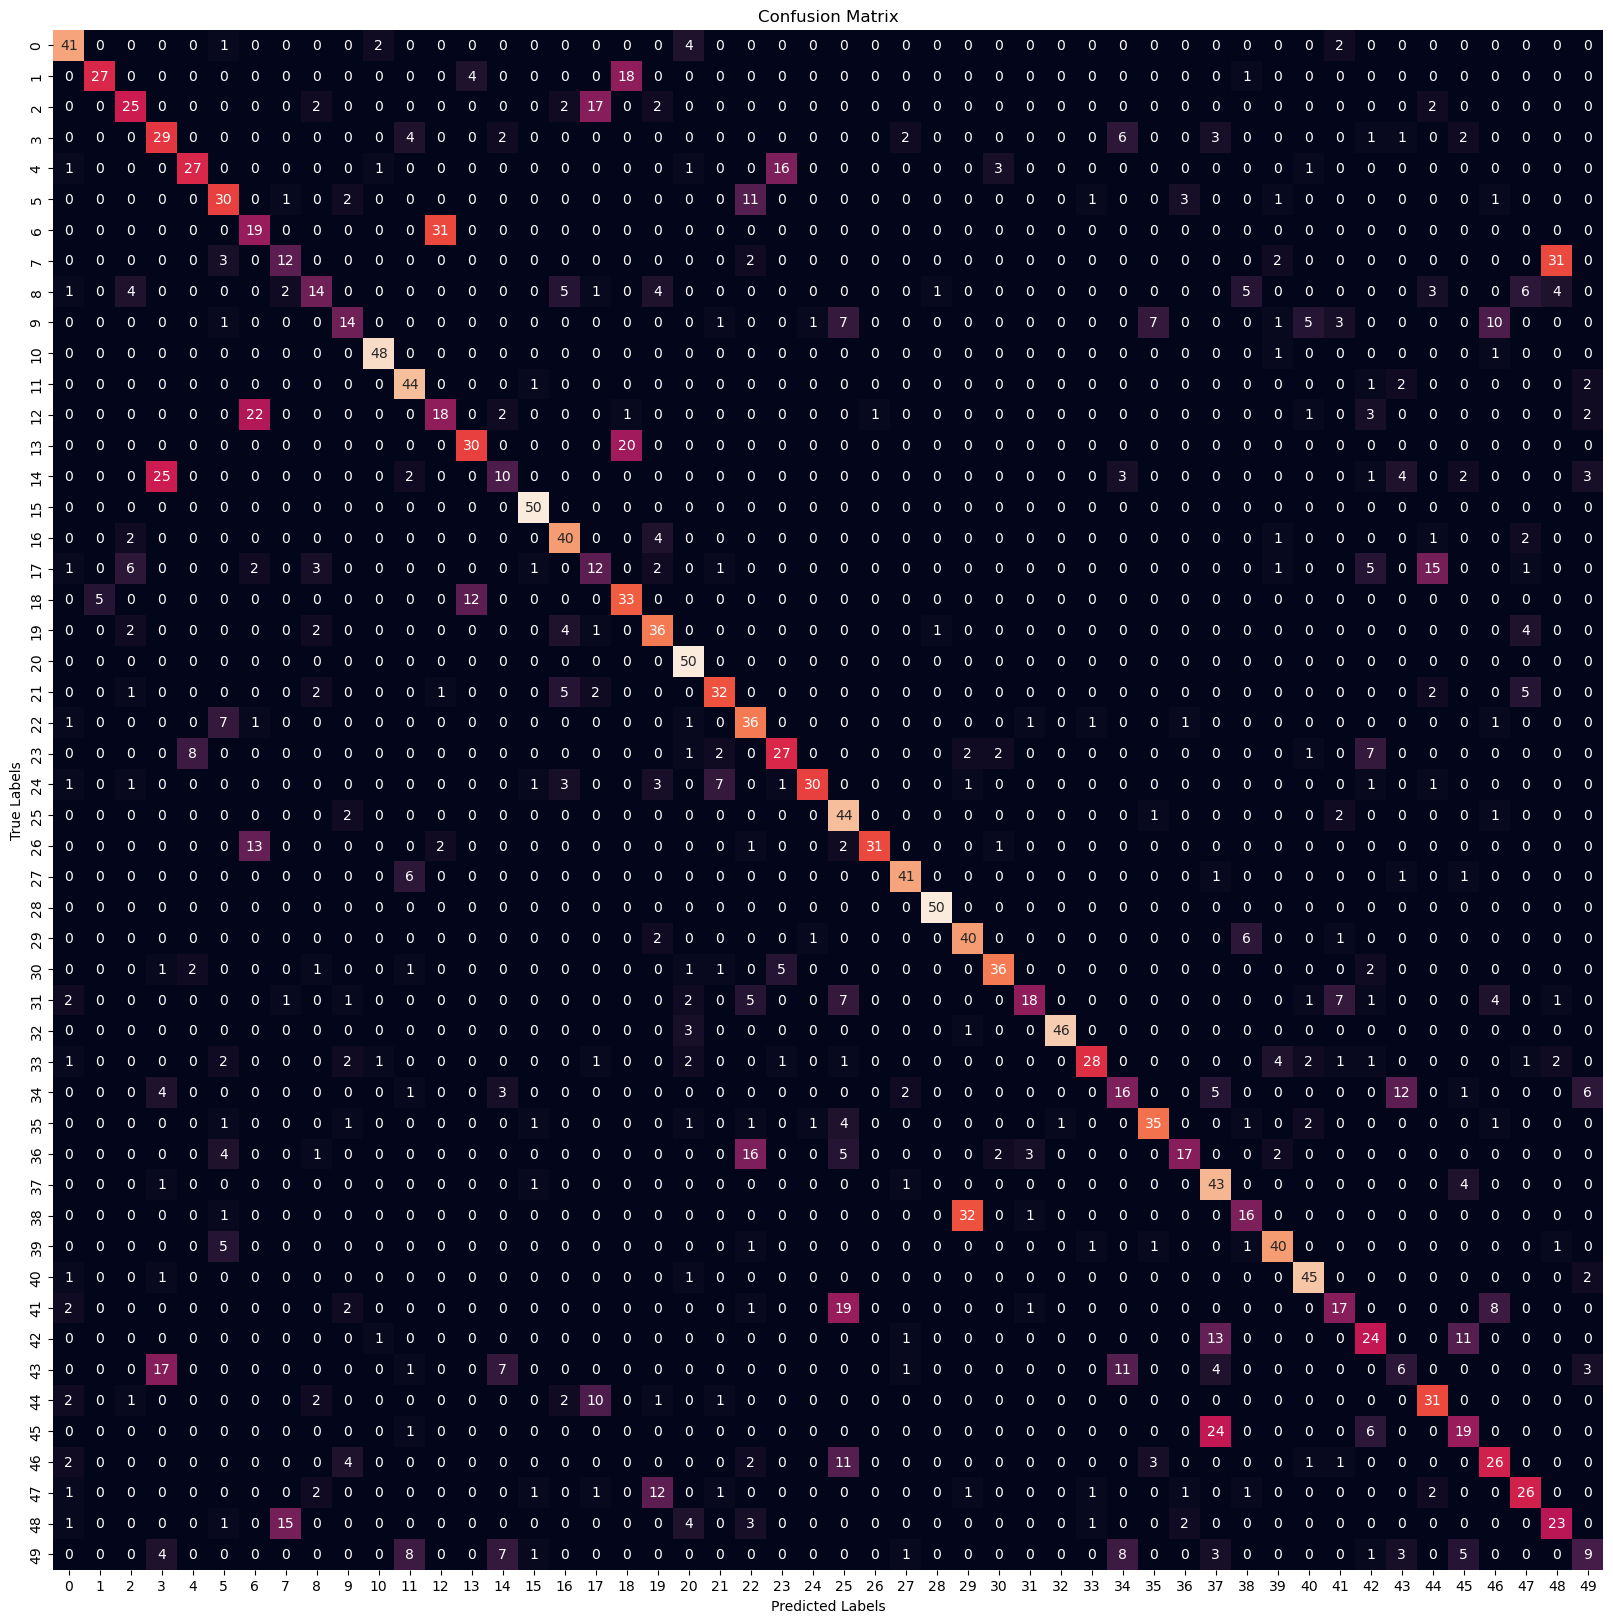

Baseline Accuracy on the test set based on majority class = 0.02
Test Accuracy: 0.5844
It is clear that our accuracy is far better than the baseline accuracy of 2.0

Top 5 labels with the worst predictions:

ScottHillis
WilliamKazer
JanLopatka
DavidLawder
JohnMastrini


In [669]:
y_pred=best_model_rf.predict(test_set)

conf_matrix = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(20, 20))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(test_labels, y_pred)
test_labels_series=pd.Series(test_labels)
baseline_accuracy=len(test_labels_series[test_labels_series==test_labels_series.value_counts().idxmax()])/len(test_labels_series)
print("Baseline Accuracy on the test set based on majority class =",round(baseline_accuracy,2))
print("Test Accuracy:", accuracy)
print("It is clear that our accuracy is far better than the baseline accuracy of", baseline_accuracy*100)

incorrect_predictions_sum = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
worst_labels_indices = incorrect_predictions_sum.argsort()[-5:][::-1]
worst_labels = [pd.Series(test_labels).unique()[i] for i in worst_labels_indices]

print("\nTop 5 labels with the worst predictions:\n")
for label in worst_labels:
    print(label)

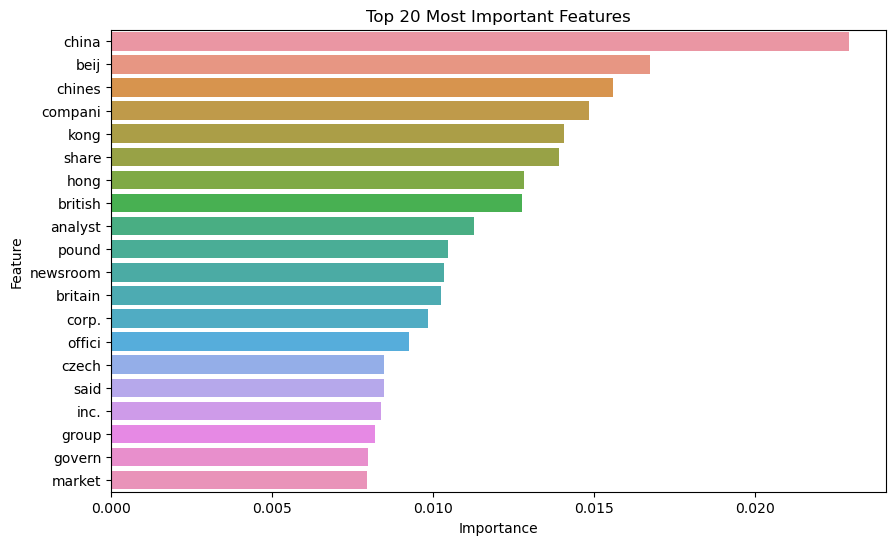

In [670]:
feature_importances = best_model_rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': train_set.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

n = 20

top_features = feature_importance_df.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {n} Most Important Features')
plt.show()

> - Tokens like china, beijing, chinese, company, kong are important in differentiating authors. These features are indications of the writer's or document's geography.

> - Terms like Company, Share, newsroom, corp are important and these may imply documents that are related to the world of business.

> - Both the Naive Bayes and Random Forest models exhibit a comparable accuracy of around 62%. However, the overall performance leaves much to be desired, as noticed, specific authors such as Scott Hillis, William Kazer, and Jan Lopatka display lower accuracy in comparison to other authors. This phenomenon might be attributed to the sampling strategy employed in the train and test datasets.

***
***
***

## **`Problem 8`**
***

In [639]:
grocery_list = []

with open("groceries.txt", "r") as file:
    for line in file:
        grocery_list.append([line.strip()])


grocery_df = pd.DataFrame(grocery_list, columns=["raw_data"])

display(grocery_df.head())

transactions = grocery_df.values.tolist()
for index,value in enumerate(transactions):
    for i in value:
        transactions[index]=i.split(",")

display(transactions[0:5])        

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

transactions_df = pd.DataFrame(te_ary, columns=te.columns_)

display(transactions_df.head())

raw_data
0  citrus fruit,semi-finished bread,margarine,rea...
1                       tropical fruit,yogurt,coffee
2                                         whole milk
3        pip fruit,yogurt,cream cheese ,meat spreads
4  other vegetables,whole milk,condensed milk,lon...

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics  baby food   bags  baking powder  bathroom cleaner   beef  \
0           False      False  False          False             False  False   
1           False      False  False          False             False  False   
2           False      False  False          False             False  False   
3           False      False  False          False             False  False   
4           False      False  False          False             False  False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False    False    False               False   False        False   
1  ...   False    False    False               False   False        False   
2  ...   False    False    False               False   False        False   
3  ...   False    False    False               False   False        False   
4  ...   False    False    False               False   False        False   

   white wine  whole milk  yogurt  zwieback  
0       False       False   False     False  
1       False       False    True     False  
2       False        True   False     False  
3       False       False    True     False  
4       False        True   False     False  

[5 rows x 171 columns]

In [640]:
frequent_itemsets = apriori(transactions_df, min_support=0.001, use_colnames=True)

print("Frequent Item Sets:")
print(frequent_itemsets)

association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print("\nAssociation Rules:")
print(association_rules_df)

Frequent Item Sets:
        support                                           itemsets
0      0.008033                            (Instant food products)
1      0.033452                                         (UHT-milk)
2      0.003559                                 (abrasive cleaner)
3      0.003254                                 (artif. sweetener)
4      0.017692                                    (baking powder)
...         ...                                                ...
13483  0.001017  (root vegetables, yogurt, citrus fruit, whole ...
13484  0.001017  (tropical fruit, root vegetables, yogurt, whol...
13485  0.001322  (tropical fruit, root vegetables, yogurt, whol...
13486  0.001322  (tropical fruit, rolls/buns, root vegetables, ...
13487  0.001118  (tropical fruit, root vegetables, yogurt, whol...

[13488 rows x 2 columns]

Association Rules:
                    antecedents  \
0               (bottled water)   
1       (Instant food products)   
2                      (b

In [641]:
min_support_threshold = 0.02
filtered_itemsets = frequent_itemsets[frequent_itemsets['support'] >= min_support_threshold]

sorted_itemsets = filtered_itemsets.sort_values(by='support', ascending=False)

print("Sorted Frequent Itemsets:")
display(sorted_itemsets)

Sorted Frequent Itemsets:


support                         itemsets
156   0.255516                     (whole milk)
97    0.193493               (other vegetables)
117   0.183935                     (rolls/buns)
132   0.174377                           (soda)
157   0.139502                         (yogurt)
...        ...                              ...
1872  0.020539        (frankfurter, whole milk)
540   0.020437       (whole milk, bottled beer)
2020  0.020437  (whole milk, frozen vegetables)
2796  0.020437      (tropical fruit, pip fruit)
756   0.020031       (butter, other vegetables)

[122 rows x 2 columns]

Sorted and Filtered Association Rules:


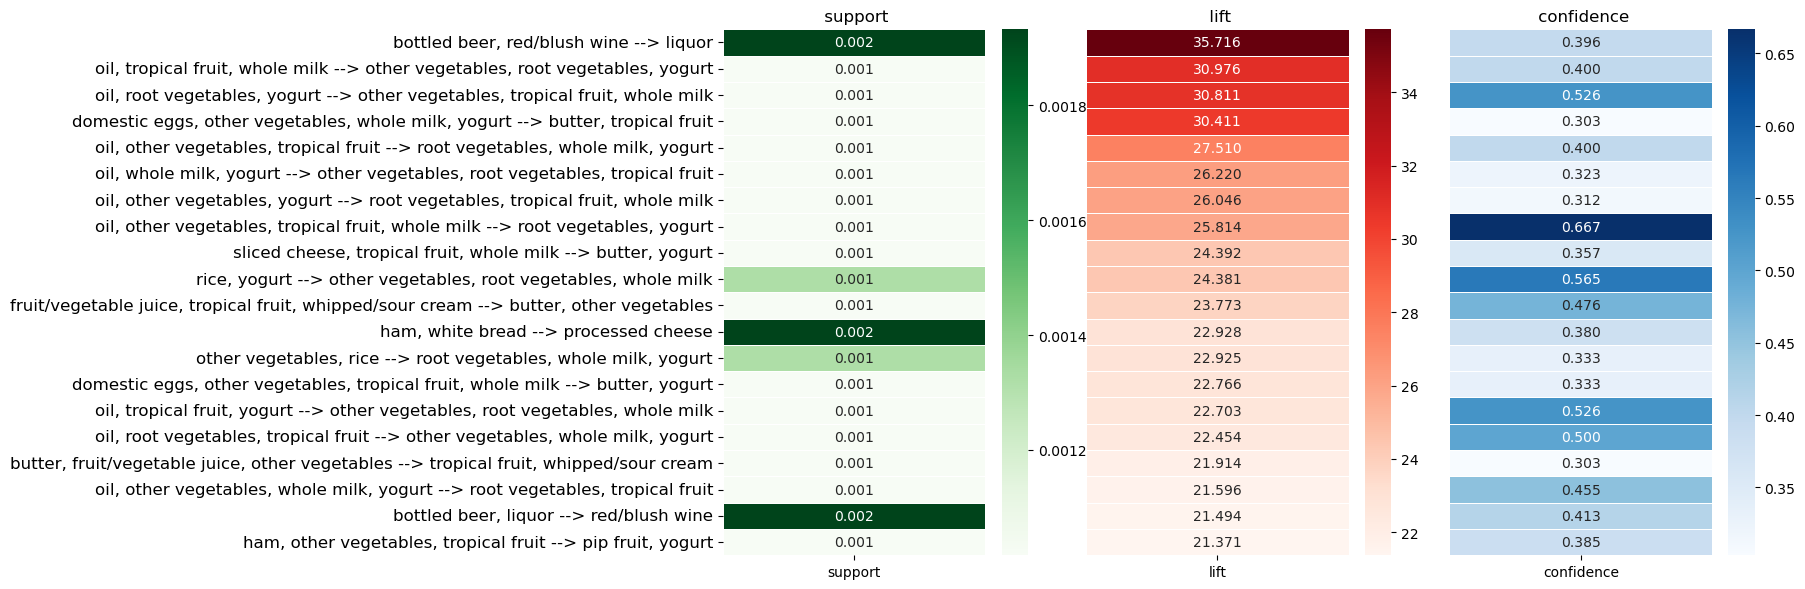

In [642]:
min_confidence_threshold = 0.3 
min_lift_threshold = 15

filtered_rules = association_rules_df[
    (association_rules_df['confidence'] >= min_confidence_threshold) &
    (association_rules_df['lift'] >= min_lift_threshold)
]

sorted_rules = filtered_rules.sort_values(by='lift', ascending=False)

print("Sorted and Filtered Association Rules:")
final_df=sorted_rules[0:20]


final_df = final_df[['antecedents','consequents','support','confidence','lift']]
final_df['antecedent_consequent'] = final_df['antecedents'].apply(lambda x: ', '.join(sorted(x))) + \
                                    ' --> ' + \
                                    final_df['consequents'].apply(lambda x: ', '.join(sorted(x)))

final_df = final_df[['antecedents', 'consequents', 'antecedent_consequent', 'support', 'lift', 'confidence']]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for idx, column in enumerate(final_df.columns[3:]):
    cmap = "Greens"
    if column == "confidence":
        cmap = "Blues"
    elif column == "lift":
        cmap = "Reds"
    

    y_labels = final_df['antecedent_consequent'].tolist()
    if idx == 0:
        sns.heatmap(final_df[[column]], cmap=cmap, annot=True, fmt=".3f", linewidths=.5, ax=axes[idx])
        axes[idx].set_yticklabels(y_labels, rotation=0, ha="right", fontsize=12)
    else:
        sns.heatmap(final_df[[column]], cmap=cmap, annot=True, fmt=".3f", linewidths=.5, ax=axes[idx], yticklabels=False)
    
    axes[idx].set_title(f" {column}")

plt.tight_layout()
plt.show()

***
***
***

## **`Problem 9`**
***

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


data_dir = 'EuroSAT_RGB'
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
dataset = ImageFolder(data_dir, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

class BetterCNN(nn.Module):
    def __init__(self, num_classes):
        super(BetterCNN, self).__init__()
    
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        out = self.pool(nn.functional.relu(self.conv1(x)))
        out = self.pool(nn.functional.relu(self.conv2(out)))
        out = self.pool(nn.functional.relu(self.conv3(out)))
        out = out.view(out.size(0), -1)
        out = nn.functional.relu(self.fc1(out))
        out = self.dropout1(out)
        out = nn.functional.relu(self.fc2(out))
        out = self.dropout2(out)
        out = self.fc3(out)
        return out



num_classes = len(dataset.classes)
model = BetterCNN(num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

model.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

test_accuracy = 100 * correct / total
print("Overall Test-Set Accuracy: {:.2f}%".format(test_accuracy))

num_examples_to_display = 5
fig, axes = plt.subplots(1, num_examples_to_display, figsize=(15, 3))
model.eval()
with torch.no_grad():
    for i in range(num_examples_to_display):
        img, label = test_dataset[i]
        output = model(img.unsqueeze(0))
        predicted = output.argmax(1).item()
        axes[i].imshow(img.permute(1, 2, 0).numpy())
        axes[i].set_title(f"Predicted: {dataset.classes[predicted]}\nActual: {dataset.classes[label]}")
        axes[i].axis("off")
plt.show()

conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=range(num_classes))
display_labels = [f'{label} ({idx})' for idx, label in enumerate(dataset.classes)]
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=display_labels)

plt.figure(figsize=(10, 8))
conf_matrix_display.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> NOTE: The model's accuracy, example images, and confusion matrix are shown below. The results are presented as an image because the model took over 3 hours to run, and this was one saved version, with the best accuracy achieved out of multiple trials

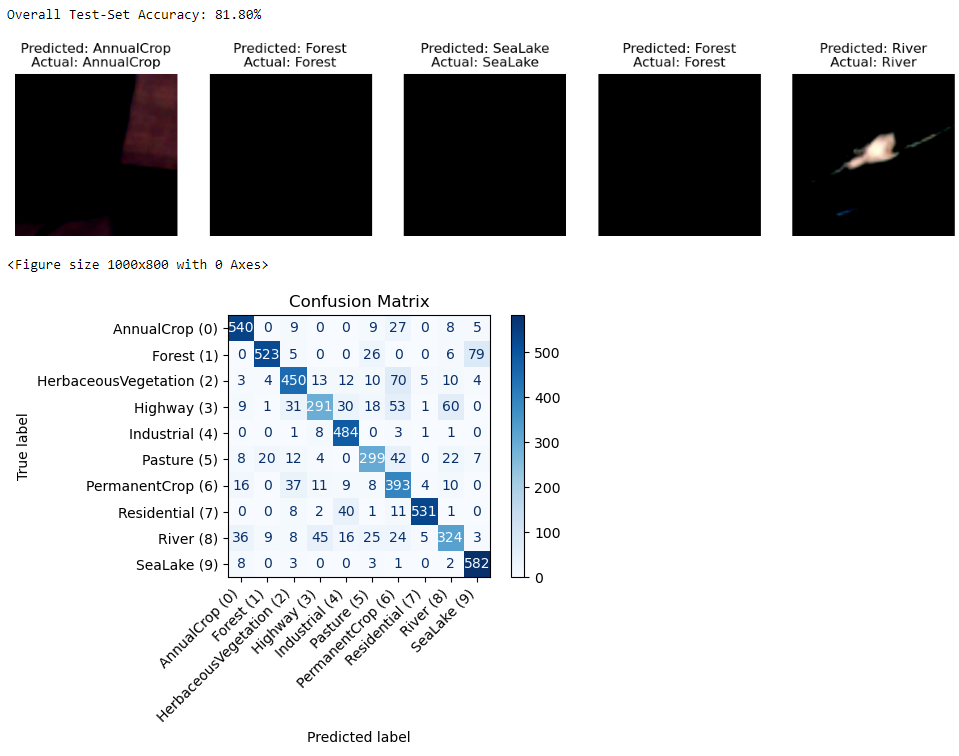

***
***
***